Ноутбук по обработке базы


*   [Чистка базы](#scrollTo=2xNTMKSOz_xO). Раздел, где проводится основной анализ и очистка базы загрязнений
*   [Снимки](#scrollTo=v_j9f6uXxyzU). Черновой раздел тестирования базы снимков, изучение прямыми методами 
*   [Получение Bbox](#scrollTo=aGBlbzBAzo-0). Раздел, где из архивов снимков извлекается Bbox с координатами спутниковых
*   [bbox vs polution](#scrollTo=lOcin-zik5bk). Соединение снимков и исходной таблицы с загрязнениями
*   [Загрузка](#scrollTo=DTJmi_J6LufJ). Переработка всей базы снимков и сохранения только необходимых
*   [Описание работы](#scrollTo=qeez5DuGNqSu)



In [ ]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

#Чистка базы

In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1KgGBFb-Tb1e3mGycO4KFwPtCmk3Us4Fg'),None,False)
df = pd.read_excel(file_name)
df

Downloading...
From: https://drive.google.com/uc?id=1KgGBFb-Tb1e3mGycO4KFwPtCmk3Us4Fg
To: /content/Reestr-ZZ-na-18.05.2021.xlsx
100%|██████████| 17.4M/17.4M [00:00<00:00, 108MB/s] 


,Корректировка реестра,Unnamed: 1,Предприятие,Лицензионный участок,Unnamed: 4,Вид приоритетного загрязняющего вещества,Регистрационный номер загрязненного участка (предприятия),Регистрационный номер загрязненного участка в Реестре,Старые регистрационные номера (примечание),Местоположение загрязненного участка,Административный район,Координаты загрязненного участка (в географической системе координат),Unnamed: 12,Дата регистрации в Реестре,Дата факта последнего разлива,Акт технического расследования,Unnamed: 16,Категория земель до загрязнения,Наличие специальных защитных зон,"Площадь загрязненного участка, га","Уровень загрязнения почв и земель нефтью, нефтепродуктами, мг/кг","Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг; уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм",Год планируемой рекультивации,Unnamed: 23,Результаты освидетельствования,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Решение об исключении,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,NaN,Название,Номер,NaN,NaN,NaN,NaN,NaN,NaN,Долгота,Широта,NaN,NaN,Номер,Дата,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Площадь,NaN,Акт осмотра,NaN,Заключение Территориального подразделения,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1,2,3,4,5,6,NaN,7,8,9,10,11,12,13,14,15,16,NaN,18,19,20,NaN,Результаты освидетельствования,освидетельствовано,Дата,№,Дата,№,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,394 Т,ЛУК-2016-6,NaN,Район КП №186 (15м от дороги),Сургутский,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.1703,"48300,0",нет,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,395 Т,ЛУК-2016-7,NaN,Район КП №186 (30м от дороги),Сургутский,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.2595,"42300,0",нет,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,433Т,ЛУК-КГ-2018-1,NaN,т.вр.251А-т.вр.250А,Сургутский,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,1905-07-10 00:00:00,отсутствует,2018 (при осмотре,земли лесного фонда,нет,0.1559,"40600,0",нет,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(axis=1,how="all",thresh=3,inplace=True)
df.dropna(axis=0,how="all",thresh=10,inplace=True)

In [ ]:
df

,Корректировка реестра,Unnamed: 1,Предприятие,Лицензионный участок,Unnamed: 4,Вид приоритетного загрязняющего вещества,Регистрационный номер загрязненного участка (предприятия),Регистрационный номер загрязненного участка в Реестре,Старые регистрационные номера (примечание),Местоположение загрязненного участка,Административный район,Координаты загрязненного участка (в географической системе координат),Unnamed: 12,Дата регистрации в Реестре,Дата факта последнего разлива,Акт технического расследования,Unnamed: 16,Категория земель до загрязнения,Наличие специальных защитных зон,"Площадь загрязненного участка, га","Уровень загрязнения почв и земель нефтью, нефтепродуктами, мг/кг","Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг; уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм",Год планируемой рекультивации
1,NaN,NaN,1,2,3,4,5,6,NaN,7,8,9,10,11,12,13,14,15,16,NaN,18,19,20
2,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,394 Т,ЛУК-2016-6,NaN,Район КП №186 (15м от дороги),Сургутский,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.1703,"48300,0",нет,2020
3,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,395 Т,ЛУК-2016-7,NaN,Район КП №186 (30м от дороги),Сургутский,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,1905-07-08 00:00:00,отсутствует,2016*(выявлено при осмотре),земли лесного фонда,нет,0.2595,"42300,0",нет,2020
4,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,433Т,ЛУК-КГ-2018-1,NaN,т.вр.251А-т.вр.250А,Сургутский,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,1905-07-10 00:00:00,отсутствует,2018 (при осмотре,земли лесного фонда,нет,0.1559,"40600,0",нет,2021
5,NaN,NaN,ТПП «Когалымнефтегаз»,Тевлинско-Русскинской,ХМН00035НЭ,нефть,492Т,ЛУК-КГ-2020-1,NaN,"""т.п.3-т.вр.1"" Ц-6 Т",Сургутский,"73°32'50,9""","62°33' 27,4""",2021-02-18 00:00:00,2019,отсутствует,2019(выявлено при осмотре),земли лесного фонда,нет,0.0100,"48300,0",нет,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,NaN,NaN,"ООО ""Тарховское""",Ершовый,ХМН14654НЭ,подтоварная вода,Е -2020/3,ПП-2020-3,NaN,р-он поворота на АБК Ершового лу (н/с Гор.Пере...,Нижневартовский,77.7429,61.1666,2021-02-18 00:00:00,**,3,2020-11-23 00:00:00,"земли лесного фонда, земли промышленности",-,0.0983,умеренное,0,2021
12029,NaN,NaN,"ООО ""Тарховское""",Восточно-Ершовый,ХМН03083НП,нефть,02Е/18,ПП-2018-2,NaN,н.п. к.1-вр.в н/с к.82В,Нижневартовский,77.8856,61.3101,2019-03-29 00:00:00,2018-02-28 00:00:00,2,2018-02-28 00:00:00,земли лесного фонда,-,0.0001,низкий,0,2020
12031,NaN,NaN,"ООО ""Тарховское""",Туль-Еганский,ХМН14659НЭ,нефть,4,ПП-2013-207,NaN,Район скв.21,Нижневартовский,77.8659,61.3555,2014-02-15 00:00:00,нет данных,нет данных,нет данных,земли лесного фонда,NaN,0.1541,умеренное,0,2020
12036,NaN,NaN,ООО «Руфьеганнефтегаз»,Мыхлорский,ХМН 02640 НЭ,нефтепродукты,1-Р/2020,РУФ-2020-1,NaN,Н/пр. от задвижки №2 Руф. м/р до задвижки №3 М...,Нижневартовский,"77° 32´ 21,5´´","61°19´00,8´´",2020-02-18 00:00:00,18.03.2020,1,2020-03-19 00:00:00,земли лесного фонда,-,0.0200,>100000,-,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 1 to 12051
Data columns (total 23 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   Корректировка реестра                                                                                                                                            884 non-null    object 
 1   Unnamed: 1                                                                                                                                                       0 non-null      object 
 2   Предприятие                                                                                                                   

In [ ]:
df['Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг;  уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм'].value_counts()

вне акватоий                   5194
-                              4912
вне акваторий                   774
0                               639
 -                              192
нет                              18
не попадало в водный объект       7
 -                                3
_                                 2
19                                1
9                                 1
7                                 1
4                                 1
1                                 1
Name: Уровень содержания нефти, нефтепродуктов в донных отложениях водных объектов, мг/кг;  уровень содержания нефти, нефтепродуктов в поверхностных водах, мг/куб.дм, dtype: int64

In [ ]:
df['Координаты загрязненного участка (в географической системе координат)'].value_counts()


72° 49' 7''           11
71° 59' 17''           8
72° 36' 36''           8
72° 55' 30''           8
72° 58' 26''           8
                      ..
72.6492                1
76.583884              1
76.8750635706          1
76.371682              1
66° 32' 28.559868"     1
Name: Координаты загрязненного участка (в географической системе координат), Length: 10373, dtype: int64

In [ ]:
df['Unnamed: 12'].value_counts()

60° 33' 32''    15
60° 40' 31''    13
60° 43' 16''    12
60° 47' 38''    11
60° 46' 4''     10
                ..
61.140836777     1
60.54717         1
61.160878        1
61° 4' 15''      1
61.030338        1
Name: Unnamed: 12, Length: 9842, dtype: int64

In [ ]:
df['Местоположение загрязненного участка'].value_counts()

рай-н ДНС26                                  93
К-2099                                       52
рай-н ОПБ                                    19
т.56 - т.58                                  18
уз.9 - уз.13                                 15
                                             ..
к.203-уз.34                                   1
т.15-т.13 (800 м. от т.13 в сторону с.15)     1
т.33 - к.66а  (КНС-59) (700м от т.33)         1
 К.У.р-н фед. а\дороги - ДНС-1К               1
60м северо-западнее К34                       1
Name: Местоположение загрязненного участка, Length: 9069, dtype: int64

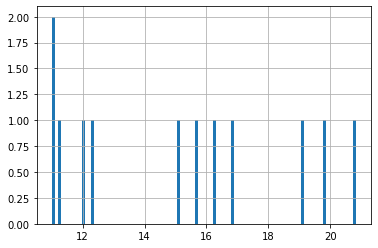

In [ ]:
df.loc[df['Площадь загрязненного участка, га']>10,'Площадь загрязненного участка, га'].hist(bins=100); 

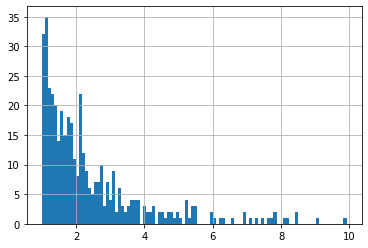

In [ ]:
df.loc[(df['Площадь загрязненного участка, га']>1) & (df['Площадь загрязненного участка, га']<=10),'Площадь загрязненного участка, га'].hist(bins=100); 

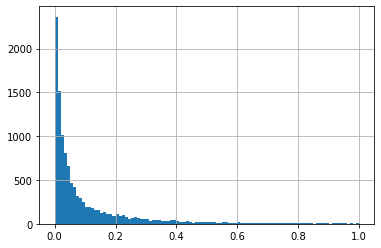

In [ ]:
df.loc[df['Площадь загрязненного участка, га']<=1,'Площадь загрязненного участка, га'].hist(bins=100); 

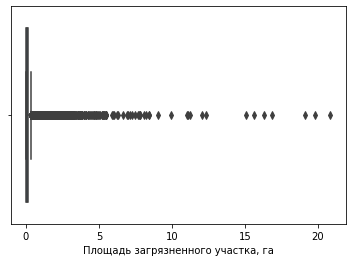

In [ ]:
sns.boxplot(x='Площадь загрязненного участка, га', data=df);

In [ ]:
df.loc[(df['Площадь загрязненного участка, га']>0.0001),'Вид приоритетного загрязняющего вещества'].value_counts()

нефтесодержащая жидкость      3904
ВНЭ                           3040
подтоварная вода              2522
нефть                          889
нефтяная эмульсия              687
нефтепродукты                  466
Нефть                           90
газовый конденсат               51
газовая смесь                   31
вмж                             16
нефть, нефтепродукты            12
Нефть, нефтепродукты            10
Подтоварная вода                 8
газоводонефтяная эмульсия        4
водонефтяная эмульсия            2
Вода подтоварная                 1
Нефтяная эмульсия                1
вода промысловая сточная         1
нефтегазожидкостная смесь        1
Name: Вид приоритетного загрязняющего вещества, dtype: int64

In [ ]:
df['Категория земель до загрязнения'].value_counts()

земли лесного фонда                                                                     4071
земли лесного фонда в долгосрочной аренде                                               3382
земли лесного фонда                                                                     1562
земли промышленности                                                                     669
земли промышленности; земли лесного фонда                                                410
                                                                                        ... 
земли запаса; земли лесного фонда                                                          1
земли населенных пунктов; земли лесного фонда                                              1
земли промышленности, земли лесного фонда в долгосрочной аренде, земли лесного фонда       1
Земли населенных пунктов; земли лесного фонда                                              1
15                                                                    

In [ ]:
columns = ['Вид приоритетного загрязняющего вещества','Координаты загрязненного участка (в географической системе координат)','Unnamed: 12','Дата регистрации в Реестре','Категория земель до загрязнения','Площадь загрязненного участка, га']
df_clean = df[columns]
df_clean.drop(index=1,inplace=True)
df_clean.reset_index(drop=True,inplace=True)
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Вид приоритетного загрязняющего вещества,Координаты загрязненного участка (в географической системе координат),Unnamed: 12,Дата регистрации в Реестре,Категория земель до загрязнения,"Площадь загрязненного участка, га"
0,нефть,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,"73°32'50,9""","62°33' 27,4""",2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,"73°59'00,23""","62°07'45,67""",2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.7429,61.1666,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.8856,61.3101,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.8659,61.3555,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,"77° 32´ 21,5´´","61°19´00,8´´",2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
columns = df_clean.columns
new_columns = {
    columns[0]:'cat_pollution',
    columns[1]:'lat',
    columns[2]:'lon',
    columns[3]:'date',
    columns[4]:'cat_ground',
    columns[5]:'square',
}
new_columns

{'Unnamed: 12': 'lon',
 'Вид приоритетного загрязняющего вещества': 'cat_pollution',
 'Дата регистрации в Реестре': 'date',
 'Категория земель до загрязнения': 'cat_ground',
 'Координаты загрязненного участка (в географической системе координат)': 'lat',
 'Площадь загрязненного участка, га': 'square'}

In [ ]:
df_clean = df_clean.rename(columns=new_columns)
df_clean

,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,"73° 30' 24,6""","62° 35' 33,3""",2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,"73° 30' 29,5""","62° 32' 36,6""",2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,"73°20'52""","62°37' 00""",2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,"73°32'50,9""","62°33' 27,4""",2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,"73°59'00,23""","62°07'45,67""",2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.7429,61.1666,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.8856,61.3101,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.8659,61.3555,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,"77° 32´ 21,5´´","61°19´00,8´´",2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
def dms2dec(val):
    if (type(val)==str):
        val = val.strip()
        val = val.replace(',','.')
        dec = re.findall(r'\d+\.*\d*', val)
        try:
            if len(dec)==3:
                ret = int(dec[0]) + int(dec[1])/60 + float(dec[2])/3600
            elif len(dec)==2:
                ret = int(dec[0]) + float(dec[1])/60
            else:
                ret = float(val)
        except:
            print(val)
            ret = val
    else:
        ret = val
    return ret

In [ ]:
dms2dec(df_clean.loc[4,'lat'])

73.98339722222222

In [ ]:
df_clean.lat = df_clean.lat.apply(dms2dec)

66° 28' 41.857608 66° 28' 38.067024
66°34'32.52"3708
62° 22' 43"3904
77 0  34/ 66.8//
77 0  39/ 46.8//
71.983447 ’


In [ ]:
df_clean.lon = df_clean.lon.apply(dms2dec)

62.083820*
60. 50520
60. 51870
61. 01022
61° 48' 59.835852 61° 48' 58.708512
62 0 04 / 41.6//
62 0 06 / 37.9//
60.492743’


In [ ]:
df_clean.loc[df_clean.lat == "66° 28' 41.857608 66° 28' 38.067024",'lat'] = "66° 28' 41.857608"
df_clean.loc[df_clean.lat == "66°34'32.52\"3708",'lat'] = "66°34'32.52"
df_clean.loc[df_clean.lat == "62° 22' 43\"3904",'lat'] = "62° 22' 43"
df_clean.loc[df_clean.lat == "77 0  34/ 66.8//",'lat'] = "77° 34' 66.8"
df_clean.loc[df_clean.lat == "77 0  39/ 46.8//",'lat'] = "77° 39' 46.8"
df_clean.loc[df_clean.lat == "71.983447 ’",'lat'] = "71.983447"

df_clean.loc[df_clean.lon == "62.083820*",'lon'] = "62.083820"
df_clean.loc[df_clean.lon == "60. 50520",'lon'] = "60.50520"
df_clean.loc[df_clean.lon == "60. 51870",'lon'] = "60.51870"
df_clean.loc[df_clean.lon == "61. 01022",'lon'] = "61.01022"
df_clean.loc[df_clean.lon == "61° 48' 59.835852 61° 48' 58.708512",'lon'] = "61° 48' 59.835852"
df_clean.loc[df_clean.lon == "62 0 04 / 41.6//",'lon'] = "62° 04' 41.6"
df_clean.loc[df_clean.lon == "62 0 06 / 37.9//",'lon'] = "62° 06' 37.9"
df_clean.loc[df_clean.lon == "60.492743’",'lon'] = "60.492743"

In [ ]:
df_clean.lat = df_clean.lat.apply(dms2dec)

In [ ]:
df_clean.lon = df_clean.lon.apply(dms2dec)

In [ ]:
df_clean

,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,73.5068,62.592583,2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,73.5082,62.543500,2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,73.3478,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,73.5475,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,73.9834,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
11807,подтоварная вода,77.7429,61.166608,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
11808,нефть,77.8856,61.310111,2019-03-29 00:00:00,земли лесного фонда,0.0001
11809,нефть,77.8659,61.355532,2014-02-15 00:00:00,земли лесного фонда,0.1541
11810,нефтепродукты,77.5393,61.316889,2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
df_clean.to_csv('clean_pollution.csv')

#Снимки

In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1pUnNNxtpRFVJWmX4uiudS4mnF1aXfibH'),None,False)

Downloading...
From: https://drive.google.com/uc?id=1pUnNNxtpRFVJWmX4uiudS4mnF1aXfibH
To: /content/2021-01.zip
100%|██████████| 641M/641M [00:03<00:00, 172MB/s]


In [ ]:
!unzip {file_name}

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: 2021-01/РН-ВНГ-2017-6/mask/CLD.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/CLM.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/CLP.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/IS_DATA.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/SCL.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/mask/SNW.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/meta_info.pkl.gz  
 extracting: 2021-01/РН-ВНГ-2017-6/timestamp.pkl.gz  
   creating: 2021-01/РН-ВНГ-2017-7/
 extracting: 2021-01/РН-ВНГ-2017-7/bbox.pkl.gz  
   creating: 2021-01/РН-ВНГ-2017-7/data/
 extracting: 2021-01/РН-ВНГ-2017-7/data/L2A.npy.gz  
   creating: 2021-01/РН-ВНГ-2017-7/mask/
 extracting: 2021-01/РН-ВНГ-2017-7/mask/CLD.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/CLM.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/CLP.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/IS_DATA.npy.gz  
 extracting: 2021-01/РН-ВНГ-2017-7/mask/SCL.npy.gz  
 extracting: 

In [ ]:
!find . -type f -name '*.gz' -exec gunzip {} +


gzip: ./2021-01/ПП-2013-198/mask/SNW.npy.gz: unexpected end of file


In [ ]:
dt = np.load('/content/2021-01/ГПН-2013-1/data/L2A.npy')
print(dt.shape)

(19, 64, 64, 13)


In [ ]:
CLD = np.load('/content/2021-01/ГПН-2013-1/mask/CLD.npy')
print(CLD.shape)

(19, 64, 64, 1)


0 0
1 0
2 0
3 0
4 0
5 0
6 11866
7 6472
8 3191
9 608
10 372
11 2051
12 43136
13 334
14 464
15 746
16 3549
17 5680
18 0


In [ ]:
CLM = np.load('/content/2021-01/ГПН-2013-1/mask/CLM.npy')
print(CLM.shape)

(19, 64, 64, 1)


0 0


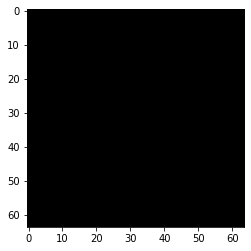

1 0


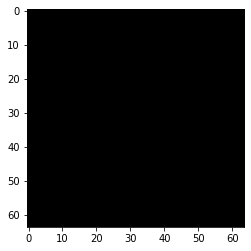

2 0


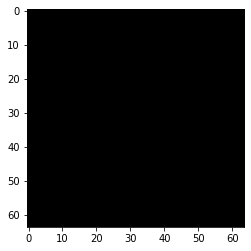

3 0


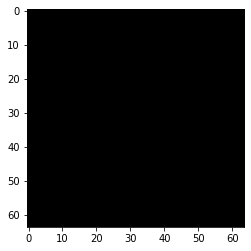

4 0


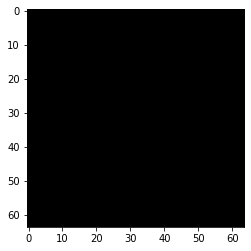

5 0


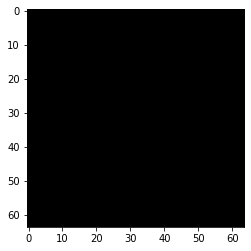

6 11866


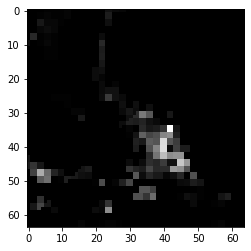

7 6472


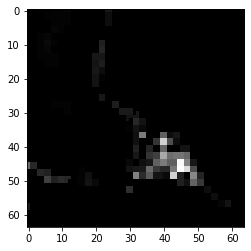

8 3191


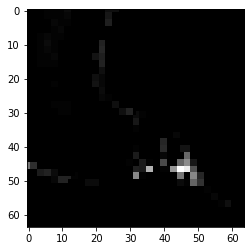

9 608


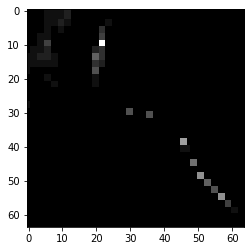

10 372


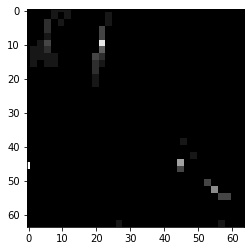

11 2051


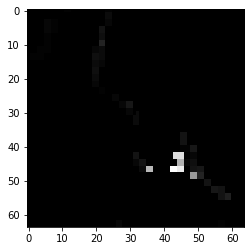

12 43136


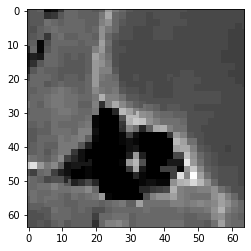

13 334


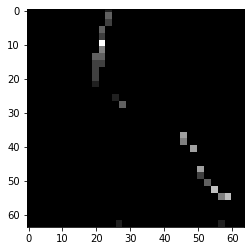

14 464


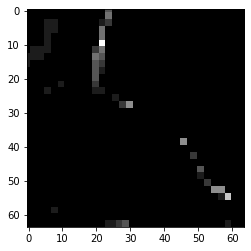

15 746


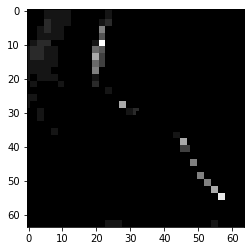

16 3549


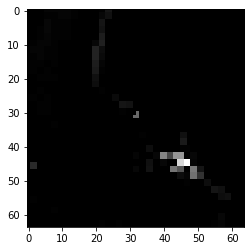

17 5680


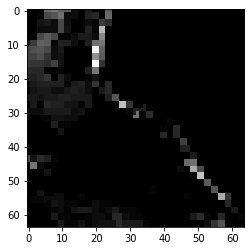

18 0


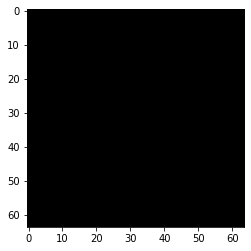

In [ ]:
for i,img in enumerate(CLD) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 


0 0


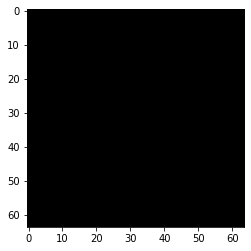

1 0


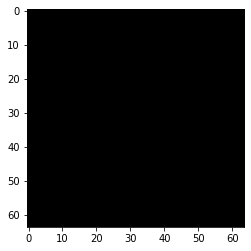

2 0


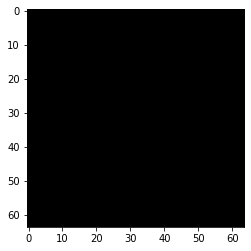

3 0


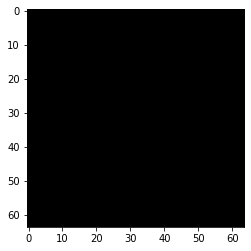

4 0


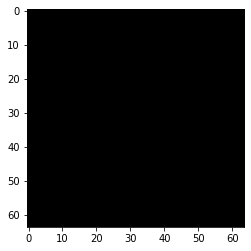

5 0


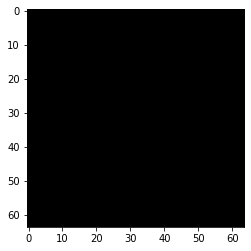

6 0


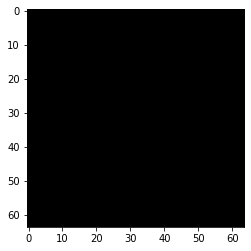

7 0


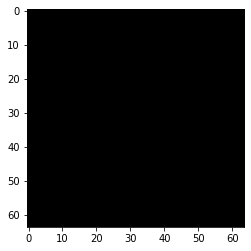

8 0


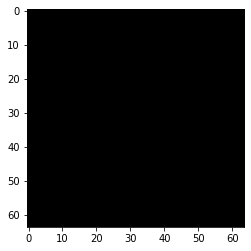

9 0


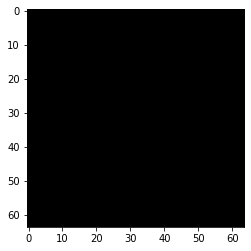

10 0


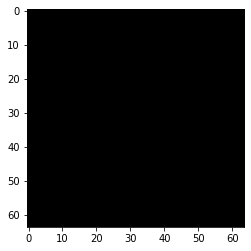

11 0


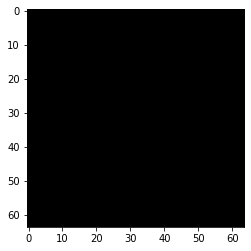

12 3262


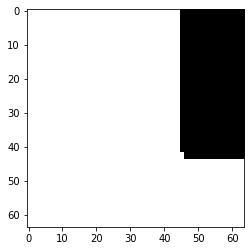

13 0


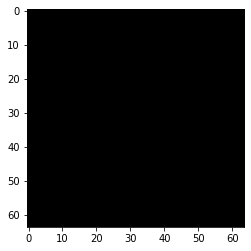

14 0


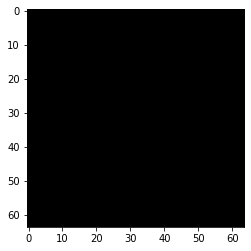

15 0


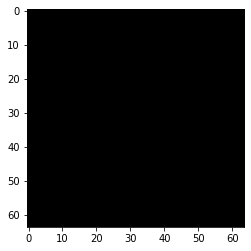

16 0


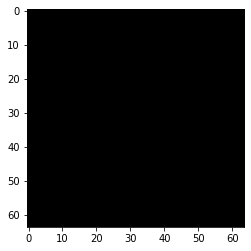

17 0


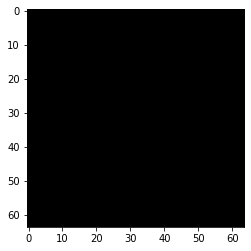

18 0


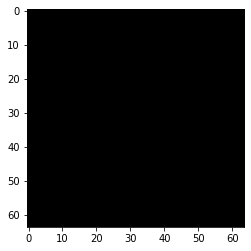

In [ ]:
for i,img in enumerate(CLM) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 


In [ ]:
CLP = np.load('/content/2021-01/ГПН-2013-1/mask/CLP.npy')
print(CLP.shape)

(19, 64, 64, 1)


0 156746


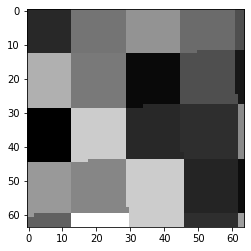

1 284537


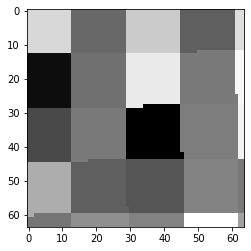

2 7086


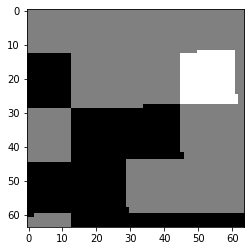

3 36587


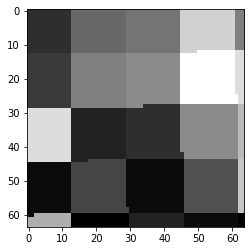

4 6269


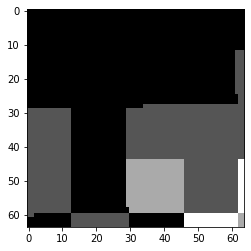

5 12073


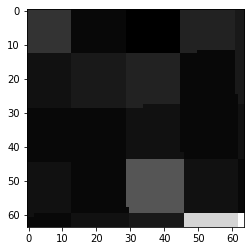

6 73116


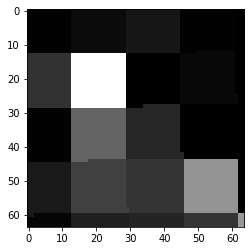

7 66291


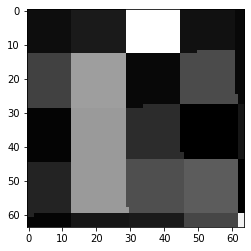

8 49297


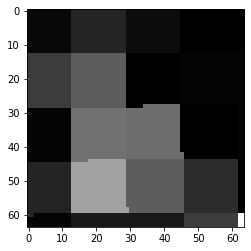

9 71829


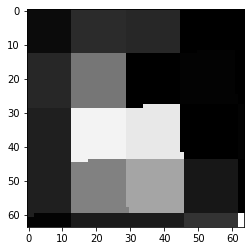

10 35730


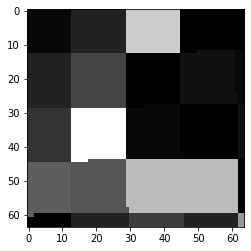

11 44610


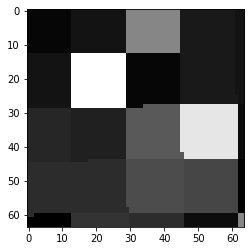

12 394329


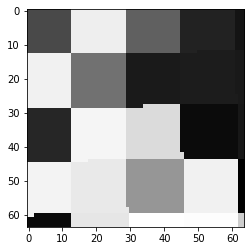

13 73268


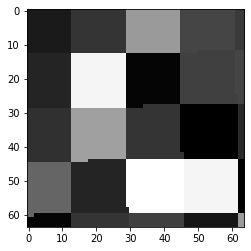

14 72453


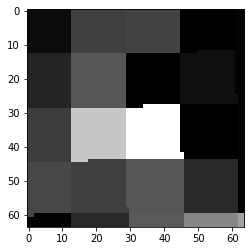

15 79764


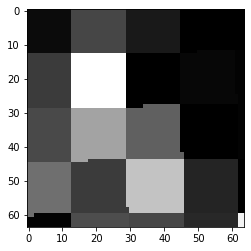

16 68056


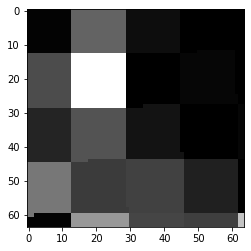

17 187287


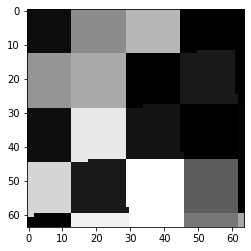

18 38289


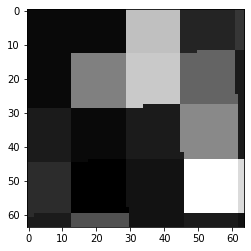

In [ ]:
for i,img in enumerate(CLP) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

(19, 64, 64, 1)
0 4096


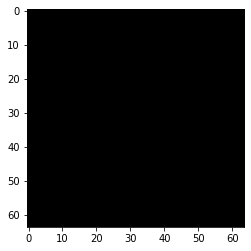

1 4096


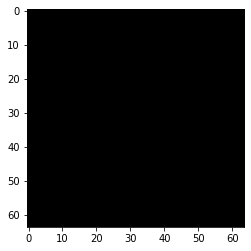

2 4096


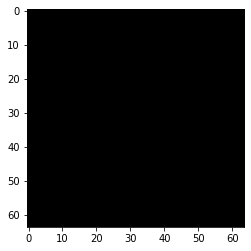

3 4096


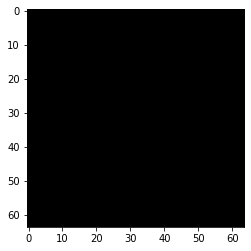

4 4096


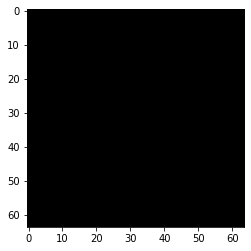

5 4096


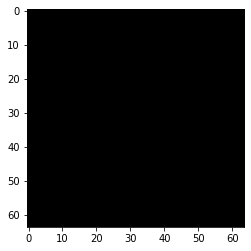

6 4096


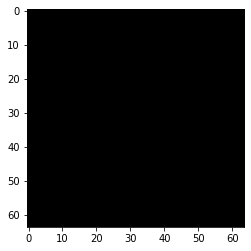

7 4096


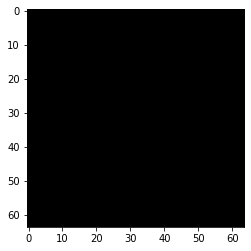

8 4096


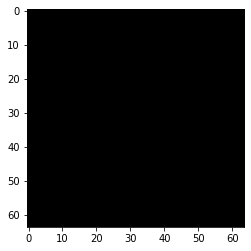

9 4096


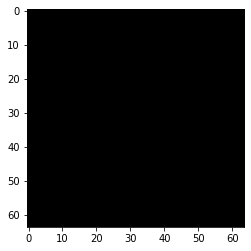

10 4096


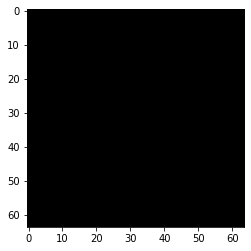

11 4096


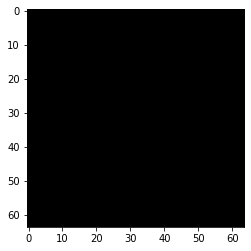

12 4096


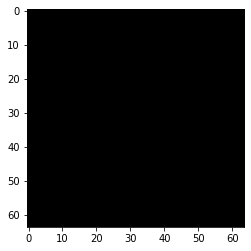

13 4096


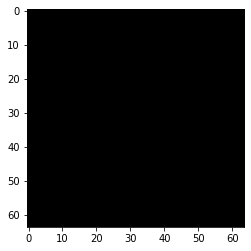

14 4096


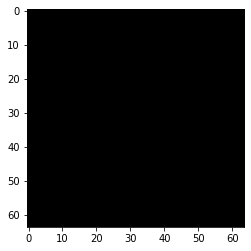

15 4096


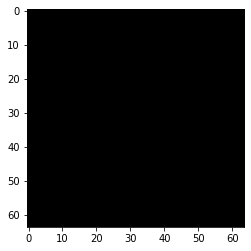

16 4096


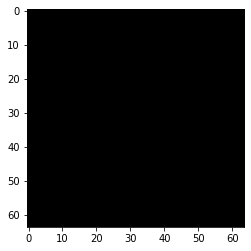

17 4096


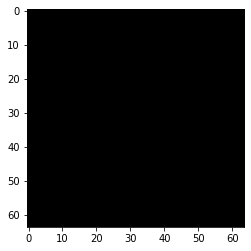

18 4096


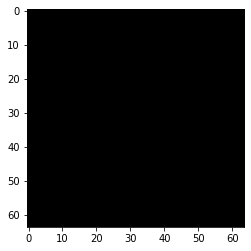

In [ ]:
IS_DATA = np.load('/content/2021-01/ГПН-2013-1/mask/IS_DATA.npy')
print(IS_DATA.shape)
for i,img in enumerate(IS_DATA) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

(19, 64, 64, 1)
0 45056


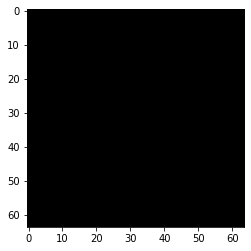

1 45056


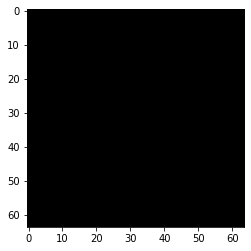

2 45056


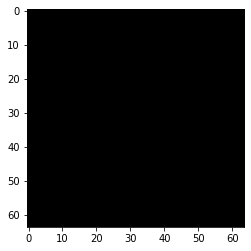

3 45056


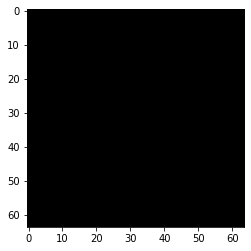

4 45056


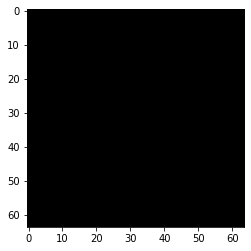

5 45036


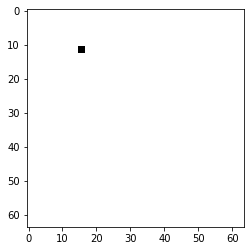

6 24092


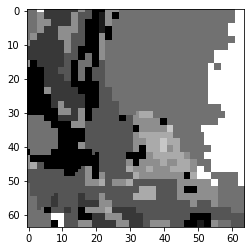

7 21511


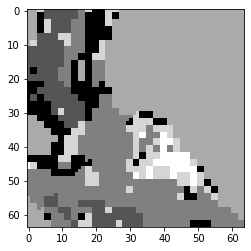

8 21280


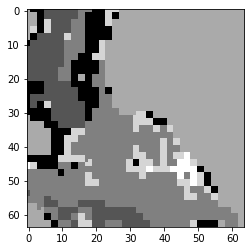

9 20956


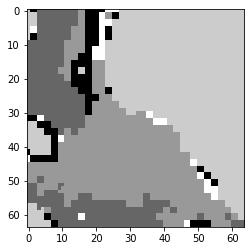

10 20874


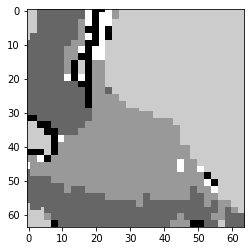

11 20609


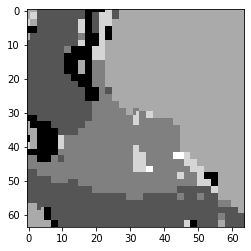

12 33304


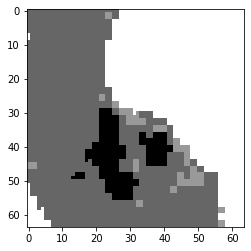

13 20444


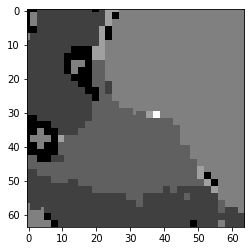

14 20461


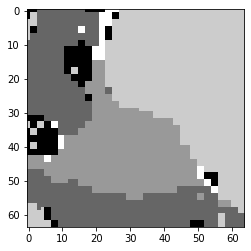

15 20669


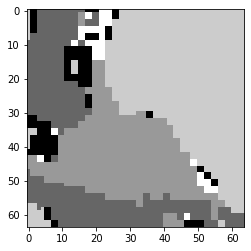

16 21316


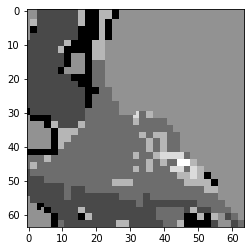

17 24255


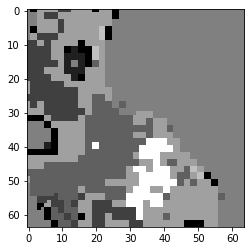

18 45056


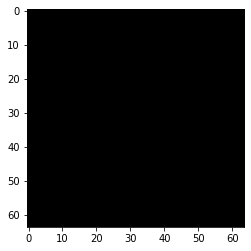

In [ ]:
SCL = np.load('/content/2021-01/ГПН-2013-1/mask/SCL.npy')
print(SCL.shape)
for i,img in enumerate(SCL) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

(19, 64, 64, 1)
0 409600


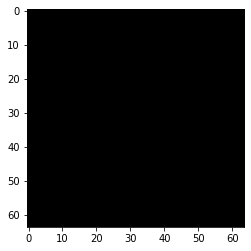

1 409600


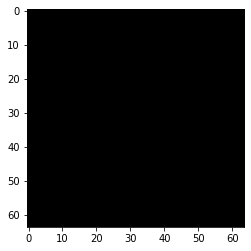

2 409600


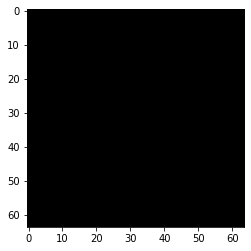

3 409600


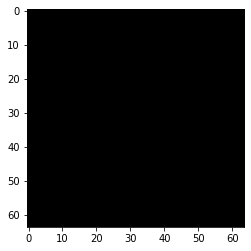

4 409527


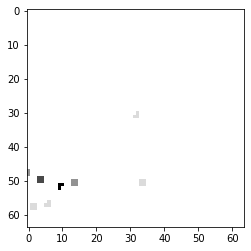

5 387967


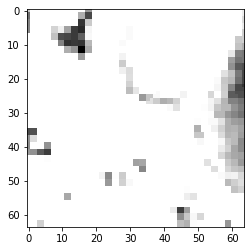

6 16806


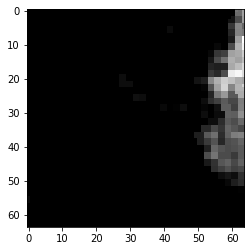

7 0


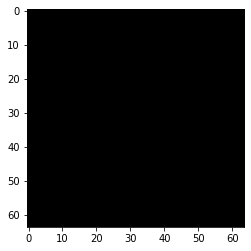

8 0


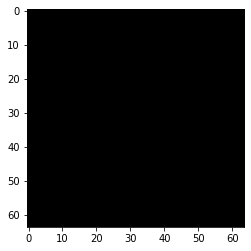

9 0


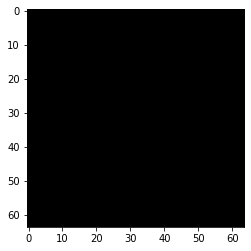

10 0


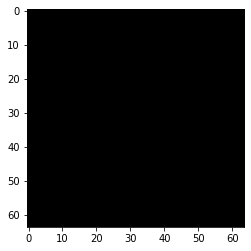

11 0


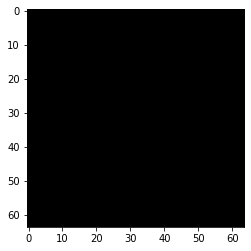

12 0


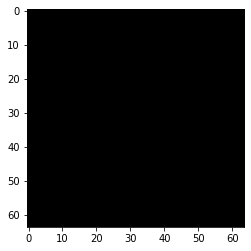

13 0


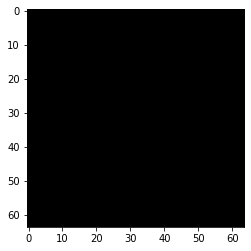

14 0


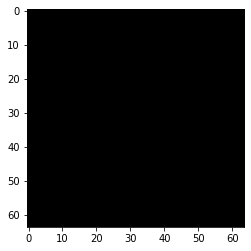

15 0


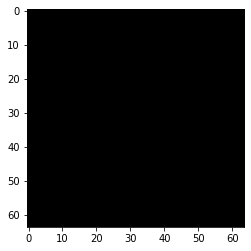

16 0


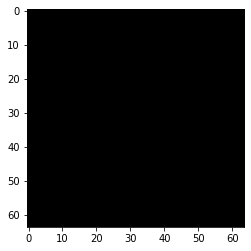

17 0


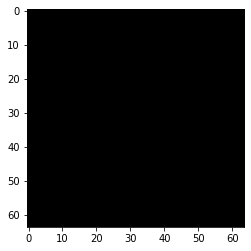

18 400621


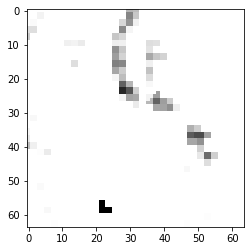

In [ ]:
SNW = np.load('/content/2021-01/ГПН-2013-1/mask/SNW.npy')
print(SNW.shape)
for i,img in enumerate(SNW) :
    print(i,img.sum())
    plt.imshow(img[:,:,0],cmap="gray")
    plt.show() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(19, 64, 64, 13)
0 345986.66


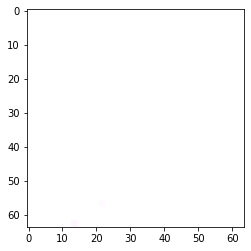

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 347043.8


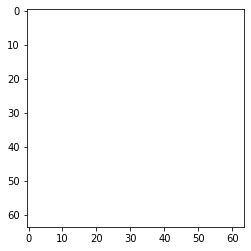

2 382578.78


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


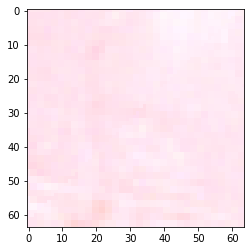

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 321184.5


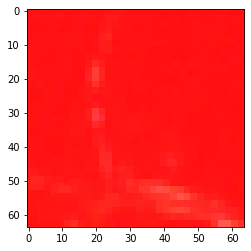

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4 312476.3


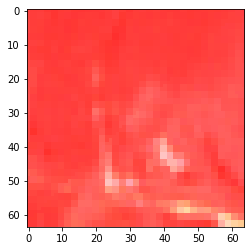

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 241923.97


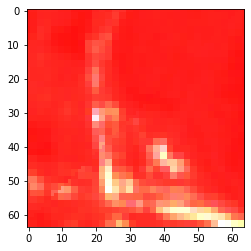

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6 64171.79


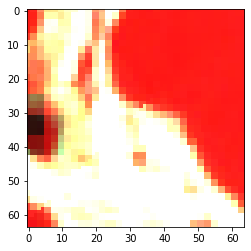

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7 47570.37


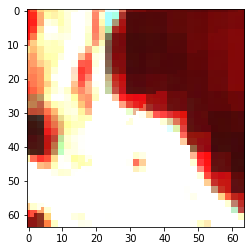

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8 42060.273


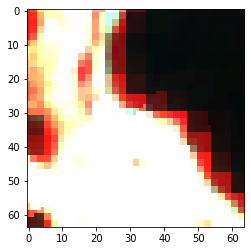

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9 53102.49


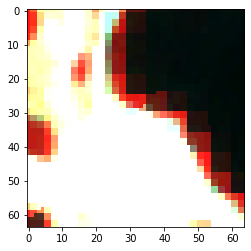

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10 53525.832


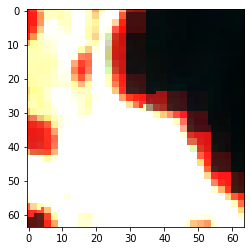

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11 49279.37


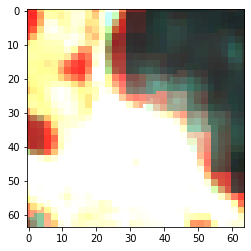

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12 84406.766


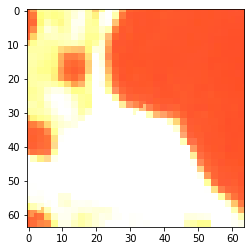

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13 52175.695


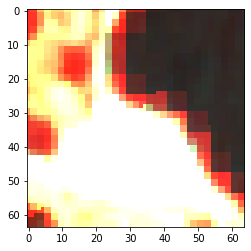

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14 52154.96


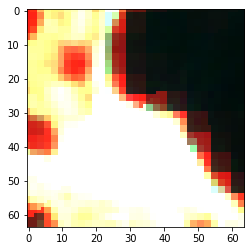

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15 49018.98


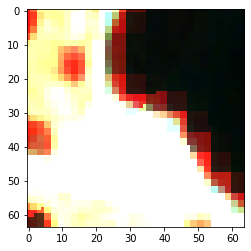

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16 45391.812


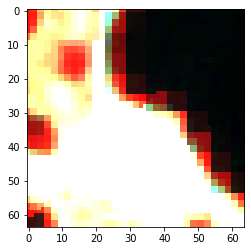

17 50677.367


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


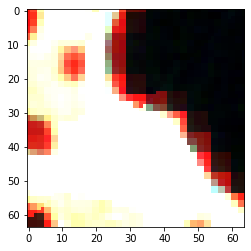

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18 270174.12


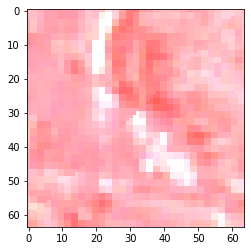

In [ ]:
L2A = np.load('/content/2021-01/ГПН-2013-1/data/L2A.npy')
print(L2A.shape)
for i,img in enumerate(L2A) :
    print(i,img.sum())
    plt.imshow(img[:,:,9:12])
    plt.show() 

#Получение Bbox

In [ ]:
pip install eo-learn

     |████████████████████████████████| 69 kB 3.1 MB/s 
     |████████████████████████████████| 10.5 MB 12.0 MB/s 
     |████████████████████████████████| 131 kB 70.3 MB/s 
     |████████████████████████████████| 133 kB 65.2 MB/s 
     |████████████████████████████████| 1.0 MB 53.7 MB/s 
     |████████████████████████████████| 201 kB 67.5 MB/s 
     |████████████████████████████████| 53.8 MB 232 kB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
     |████████████████████████████████| 15.4 MB 74 kB/s 
     |████████████████████████████████| 994 kB 64.5 MB/s 
     |████████████████████████████████| 6.3 MB 35.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.4 MB/s 
     |████████████████████████████████| 8.4 MB 22.6 MB/s 
     |████████████████████████████████| 128 kB 73.7 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 127 kB 55.3 MB/s 
     |████████████████████████████████| 47 kB 4.2 MB/s 
     |██████████████

In [ ]:
from pathlib import Path
from eolearn.core import EOPatch
import os
import zipfile

In [ ]:
INPUT_FOLDER =  '/content/drive/MyDrive/Colab Notebooks/ЦП/spills/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d_dir = '/content/spills/'
for file_name in os.listdir(INPUT_FOLDER):
    with zipfile.ZipFile(INPUT_FOLDER + file_name) as zip_ref:
        zip_ref.extractall(d_dir)

In [ ]:
# reencode all paths in extract_dir
def renamed(dirpath, names, encoding):
    new_names = [old.encode('cp437').decode(encoding) for old in names]
    for old, new in zip(names, new_names):
        os.rename(os.path.join(dirpath, old), os.path.join(dirpath, new))
    return new_names

encoding = 'cp866'
for dirpath, dirs, files in os.walk(d_dir, topdown=True):
    renamed(dirpath, files, encoding)
    dirs[:] = renamed(dirpath, dirs, encoding)

In [ ]:
dct_bbox = []
dct_timestamp = []
bad_files = []
bad_files_timestamp = []
for m_dir in os.listdir(d_dir):
    path = d_dir + m_dir
    for f_dir in os.listdir(path):
        f_path = path +'/' + f_dir
        eopatch = EOPatch.load(f_path, lazy_loading=True)
        try:
            bbox = list(eopatch['bbox'])
            dct = {'dir':m_dir,'name':f_dir,'x1':bbox[0],'y1':bbox[1],'x2':bbox[2],'y2':bbox[3]}
            dct_bbox.append(dct)
        except:
            bad_files.append(f_path)
            continue
        try:
            timestamp = eopatch['timestamp']
            for id,dt_time in enumerate(timestamp):
                dct = {'dir':m_dir,'name':f_dir,'id':id,'date':dt_time}
                dct_timestamp.append(dct)
        except:
            bad_files_timestamp.append(f_path)
            continue

In [ ]:
df_bbox = pd.DataFrame(dct_bbox)
df_bbox

,dir,name,x1,y1,x2,y2
0,2021-04,РН-СНГ-2013-5116,76.989089,61.190537,77.001351,61.196104
1,2021-04,РН-СНГ-2013-4345,76.686472,61.227745,76.698695,61.233340
2,2021-04,РН-СНГ-2013-4361,76.728468,61.229940,76.740699,61.235530
3,2021-04,РН-СНГ-2013-5163,76.923933,61.152721,76.936168,61.158294
4,2021-04,РН-СНГ-2013-5380,76.890414,61.206888,76.902665,61.212464
...,...,...,...,...,...,...
11678,2021-07,РН-СНГ-2018-626,76.485370,61.446162,76.497643,61.451774
11679,2021-07,РН-СНГ-2017-240,76.764541,61.376538,76.776836,61.382125
11680,2021-07,РН-СНГ-2018-553,76.667407,61.182925,76.679610,61.188521
11681,2021-07,РН-СНГ-2018-434,76.471186,61.143595,76.483339,61.149209


In [ ]:
df_timestamp = pd.DataFrame(dct_timestamp)
df_timestamp

,dir,name,id,date
0,2021-04,РН-СНГ-2013-5116,0,2021-01-19 06:22:13+00:00
1,2021-04,РН-СНГ-2013-5116,1,2021-02-03 06:22:09+00:00
2,2021-04,РН-СНГ-2013-5116,2,2021-03-23 06:32:05+00:00
3,2021-04,РН-СНГ-2013-5116,3,2021-04-09 06:22:06+00:00
4,2021-04,РН-СНГ-2013-5116,4,2021-05-09 06:22:07+00:00
...,...,...,...,...
151854,2021-07,РН-СНГ-2018-237,3,2021-05-22 06:32:11+00:00
151855,2021-07,РН-СНГ-2018-237,4,2021-07-03 06:22:15+00:00
151856,2021-07,РН-СНГ-2018-237,5,2021-07-06 06:32:13+00:00
151857,2021-07,РН-СНГ-2018-237,6,2021-10-31 06:22:18+00:00


In [ ]:
print(len(bad_files))
print(len(bad_files_timestamp))

121
954


In [ ]:
df_bbox.to_csv('bbox_2021.csv')
df_timestamp.to_csv('timestamp_2021.csv')

In [ ]:
pd.DataFrame(bad_files).to_csv('no_bbox_2021.csv')
pd.DataFrame(bad_files_timestamp).to_csv('no_timestamp_2021.csv')

#bbox vs polution


In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1HM0hZ8MCa_yTlh69_pRrznsHSjNrCFfA'),None,False)
df = pd.read_csv(file_name,index_col=0)
df

Downloading...
From: https://drive.google.com/uc?id=1HM0hZ8MCa_yTlh69_pRrznsHSjNrCFfA
To: /content/clean_pollution_old.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 134MB/s]


,cat_pollution,lat,lon,date,cat_ground,square,is_bbox
0,нефть,73.506833,62.592583,2017-02-15 00:00:00,земли лесного фонда,0.1703,1.0
1,нефть,73.508194,62.543500,2017-02-15 00:00:00,земли лесного фонда,0.2595,1.0
2,нефть,73.347778,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559,1.0
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100,1.0
4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050,1.0
...,...,...,...,...,...,...,...
11807,подтоварная вода,77.742867,61.166608,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983,1.0
11808,нефть,77.885611,61.310111,2019-03-29 00:00:00,земли лесного фонда,0.0001,NaN
11809,нефть,77.865905,61.355532,2014-02-15 00:00:00,земли лесного фонда,0.1541,1.0
11810,нефтепродукты,77.539306,61.316889,2020-02-18 00:00:00,земли лесного фонда,0.0200,NaN


In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1pR_hac5F1cRO-PoUHCypAWdsLvMXItr9'),None,False)
df_bbox = pd.read_csv(file_name,index_col=0)
df_bbox

Downloading...
From: https://drive.google.com/uc?id=1pR_hac5F1cRO-PoUHCypAWdsLvMXItr9
To: /content/bbox_2021.csv
100%|██████████| 1.26M/1.26M [00:00<00:00, 101MB/s]


,dir,name,x1,y1,x2,y2
0,2021-04,РН-СНГ-2013-5116,76.989089,61.190537,77.001351,61.196104
1,2021-04,РН-СНГ-2013-4345,76.686472,61.227745,76.698695,61.233340
2,2021-04,РН-СНГ-2013-4361,76.728468,61.229940,76.740699,61.235530
3,2021-04,РН-СНГ-2013-5163,76.923933,61.152721,76.936168,61.158294
4,2021-04,РН-СНГ-2013-5380,76.890414,61.206888,76.902665,61.212464
...,...,...,...,...,...,...
11678,2021-07,РН-СНГ-2018-626,76.485370,61.446162,76.497643,61.451774
11679,2021-07,РН-СНГ-2017-240,76.764541,61.376538,76.776836,61.382125
11680,2021-07,РН-СНГ-2018-553,76.667407,61.182925,76.679610,61.188521
11681,2021-07,РН-СНГ-2018-434,76.471186,61.143595,76.483339,61.149209


In [ ]:
idx = []
idx_no_pol = []
dirs = []
new_data = []
for i in range(df.shape[0]):
    row = df.loc[i]
    mask = (row.lat > df_bbox.x1) & (row.lat < df_bbox.x2) & (row.lon > df_bbox.y1) & (row.lon < df_bbox.y2)
    tmp = df_bbox.loc[mask]
    df_bbox.loc[mask,'is_pollution'] = 1
    if len(tmp)<1:
        idx_no_pol.append(i)
    else:
        for id in tmp.index:
            idx.append(id)
            df.loc[i,'is_bbox'] = 1
            dirs.append(tmp.loc[id,'dir'])
            tmp_dct = {'year':str(row['date'][:4]),'dir':str(tmp.loc[id,'dir'][-2:]),'name':tmp.loc[id,'name'],'date':row['date'],'id_pollution':i}
            new_data.append(tmp_dct)

In [ ]:
#очистка от дат меньше 2017 года
df_clean_date = df.loc[pd.to_datetime(df.date) >= '2017']
df_clean_date = df_clean_date.loc[~df_clean_date.is_bbox.isna()]
df_clean_date.drop(columns=['is_bbox'],inplace=True)
df_clean_date.reset_index(drop=True,inplace=True)
df_clean_date.loc[df_clean_date.date=='03.03,2021','date'] = '2021-03-03 00:00:00'
df_clean_date

,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,73.506833,62.592583,2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,73.508194,62.543500,2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,73.347778,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050
...,...,...,...,...,...,...
4714,нефть,77.792639,61.173361,2020-03-11 00:00:00,земли лесного фонда,0.0200
4715,нефть,77.738583,61.227111,2020-03-11 00:00:00,земли лесного фонда,0.4500
4716,подтоварная вода,77.742867,61.166608,2021-02-18 00:00:00,"земли лесного фонда, земли промышленности",0.0983
4717,нефтепродукты,77.539306,61.316889,2020-02-18 00:00:00,земли лесного фонда,0.0200


In [ ]:
df_clean_date.to_csv('clean_pollution.csv')

In [ ]:
df_files = pd.DataFrame(new_data)
df_files

,year,dir,name,date,id_pollution
0,2017,01,ЛУК-2016-6,2017-02-15 00:00:00,0
1,2017,01,ЛУК-2016-7,2017-02-15 00:00:00,1
2,2019,01,ЛУК-КГ-2018-1,2019-03-04 00:00:00,2
3,2021,01,ЛУК-КГ-2020-1,2021-02-18 00:00:00,3
4,2021,01,ЛУК-КГ-2020-2,2021-02-18 00:00:00,4
...,...,...,...,...,...
76649,2021,01,ПП-2013-129,2021-02-18 00:00:00,11807
76650,2021,01,ПП-2013-130,2021-02-18 00:00:00,11807
76651,2014,01,ПП-2013-207,2014-02-15 00:00:00,11809
76652,2020,16,РУФ-2020-1,2020-02-18 00:00:00,11810


In [ ]:
df_files.to_csv('files_pollution.csv')

#Загрузка

In [ ]:
file_name = gdown.download('https://drive.google.com/uc?id={}'.format('1EqsaKDXplnGdPG0qaa_JX25qnaHz-Yqb'),None,False)
df_files = pd.read_csv(file_name,index_col=0,dtype=str)

Downloading...
From: https://drive.google.com/uc?id=1EqsaKDXplnGdPG0qaa_JX25qnaHz-Yqb
To: /content/files_pollution.csv
100%|██████████| 4.71M/4.71M [00:00<00:00, 39.9MB/s]


In [ ]:
df_files

,year,dir,name,date,id_pollution
0,2017,01,ЛУК-2016-6,2017-02-15 00:00:00,0
1,2017,01,ЛУК-2016-7,2017-02-15 00:00:00,1
2,2019,01,ЛУК-КГ-2018-1,2019-03-04 00:00:00,2
3,2021,01,ЛУК-КГ-2020-1,2021-02-18 00:00:00,3
4,2021,01,ЛУК-КГ-2020-2,2021-02-18 00:00:00,4
...,...,...,...,...,...
76649,2021,01,ПП-2013-129,2021-02-18 00:00:00,11807
76650,2021,01,ПП-2013-130,2021-02-18 00:00:00,11807
76651,2014,01,ПП-2013-207,2014-02-15 00:00:00,11809
76652,2020,16,РУФ-2020-1,2020-02-18 00:00:00,11810


In [ ]:
d_dir = '/content/spills/'
lst2drop = []
for dirs in os.listdir(d_dir):
    year = dirs[:4]
    folder = dirs[-2:]
    for file in os.listdir(d_dir+dirs):
        mask = (df_files.year==year) & (df_files.dir==folder) & (df_files.name==file)
        if (len(df_files.loc[mask])==0):
            lst2drop.append(d_dir + dirs + '/' + file)

In [ ]:
rm_lst = ' '.join(lst2drop)

In [ ]:
f = lambda A, n=100: [A[i:i+n] for i in range(0, len(A), n)]
lst2drop_splt = f(lst2drop)

In [ ]:
for fld in lst2drop_splt:
    rm_lst = ' '.join(fld)
    !rm -r {rm_lst}

In [ ]:
!zip -r '2021.zip' './2021'

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: 2021/2021-08/РН-СНГ-2020-184/mask/CLM.npy.gz (deflated 8%)
  adding: 2021/2021-08/РН-СНГ-2020-184/mask/SCL.npy.gz (stored 0%)
  adding: 2021/2021-08/РН-СНГ-2020-184/bbox.pkl.gz (stored 0%)
  adding: 2021/2021-08/РН-СНГ-2020-184/data/ (stored 0%)
  adding: 2021/2021-08/РН-СНГ-2020-184/data/L2A.npy.gz (deflated 1%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/ (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/meta_info.pkl.gz (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/timestamp.pkl.gz (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/mask/ (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/mask/CLP.npy.gz0000644 (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/mask/SCL.npy.gz0000644 (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/mask/IS_DATA.npy.gz (deflated 14%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/mask/CLD.npy.gz0000644 (stored 0%)
  adding: 2021/2021-08/РН-ТОМСКН-2020-10/mask/SNW.

In [ ]:
!cp '2021.zip' '/content/drive/MyDrive/Colab Notebooks/ЦП/files'

In [ ]:
!curl --output '2017-01.zip' 'https://s45vla.storage.yandex.net/rdisk/81a437545421d28d2a9ffb99821ea6294e6284591499176e60086e053250d178/61aa00a9/NR5L2t6eefLT-uMG4mc5DY_R76_eQM7Zf-Mty3XPRNUlD7TlvUYNceHs4w7toUAAo4inTDvYPxNwnDBnqIB3Bw==?uid=0&filename=2017-01.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-01.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=271012921&hid=9cb36071f5f7eafbb267a2bced0fcb29&media_type=compressed&tknv=v2&rtoken=pC6UD1hz1GkX&force_default=no&ycrid=na-31f099a3ef4cd6f2bfabbad071c6af01-downloader19e&ts=5d23c4892bc40&s=8da50180c823499af051033a57dd789f9083e46be7c04db094e36becb29b5a4e&pb=U2FsdGVkX1_hR1c5H60tBreCDs4yk_lBAbncYL-KWXO4FWq1D_FtwbGYGoMgQeDMR_z-T8BjYZ5SiSJHCY4ny0UZUeSnP1RZlCX2pE5rARE'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0  258M    0  535k    0     0   167k      0  0:26:17  0:00:03  0:26:14  167k^C


In [ ]:
dct_urls_2017 = {
    '2017-01.zip':'https://s401man.storage.yandex.net/rdisk/d09c3d3dd395859afd25590d9dd35a314dfcc4103373054663439d04ea5e975b/61aa0edf/NR5L2t6eefLT-uMG4mc5DY_R76_eQM7Zf-Mty3XPRNUlD7TlvUYNceHs4w7toUAAo4inTDvYPxNwnDBnqIB3Bw==?uid=0&filename=2017-01.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-01.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=271012921&hid=9cb36071f5f7eafbb267a2bced0fcb29&media_type=compressed&tknv=v2&rtoken=5nF7Xm3i0wnf&force_default=no&ycrid=na-74a16e4a97f8026e711be9537fb17a98-downloader10f&ts=5d23d216a35c0&s=62ecdc64ac2971b6a7a57d2802c6a218fcbcdbff9b6d99dc3e7b4f874508b3ba&pb=U2FsdGVkX1-_h0Ng2Qho0z-pmpBZ9hgRA46BF4aInMtI9-1awC3AzALu8_NVCACidI0rWoqE6FObtisBoFgPyLaIdKls3ZXwcd6G6guwEfM',
    '2017-02.zip':'https://s628man.storage.yandex.net/rdisk/78c9af31f125cfc108e75682869fcd3ec62306040ad79883aafb6ddbb8baece6/61aa0c46/NR5L2t6eefLT-uMG4mc5DcwzuZ8Iie2ZsepK1Mqyv3C_0Ox0xAa11FZsrcJqjuWfwSnVk90DLsISG6FQkdveew==?uid=0&filename=2017-02.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-02.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=290348531&hid=73114ac53ab339ee1eef2f111763448c&media_type=compressed&tknv=v2&rtoken=26nnfo9AhP5L&force_default=no&ycrid=na-cc1e025cf1222d738c21be9a9b39d5af-downloader18h&ts=5d23cf9c71d80&s=b7f21c11426bddf34deee7a3a7a7cbf14fcb5bdb0598c2fd9b16f7ad67426646&pb=U2FsdGVkX19MSq0vtQ_G7iZtcm-hnwHgoxZLL2yqM1IGjkZETkMupbxadueGz8PXSVYSBfvm6LsmHaYxA9fUC4DRvr9huQnA4OZGcN2oVpM',
    '2017-03.zip':'https://s686sas.storage.yandex.net/rdisk/1a9aa0ec8709fbc258981eeccb41bd4e4043d204fc8066c9858d000573c1a5e4/61aa0c22/NR5L2t6eefLT-uMG4mc5DRXfPbBbVfaW0Z5cGm3LS2SEi34jXRM2wYelXtIN0SIrZgZioLRDdgb228uIxGjkqQ==?uid=0&filename=2017-03.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-03.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=387782670&hid=34e7799aa12394f4581ac7fc9a1df032&media_type=compressed&tknv=v2&rtoken=dfjorBBWAjxC&force_default=no&ycrid=na-00f982ef5d058191678eba048f47042c-downloader6h&ts=5d23cf7a1cc80&s=41980573bcf72b6f4b1d89210ac730dfdacfecf1b6d50b9aa1f45a56e2b97897&pb=U2FsdGVkX1_SATFvL34X6p8fIsJKNeB4T7a380ZZ7-bxEYqSxH2tdO5xHtbLWp8QPy5-WnYbXTdkrsnZNi3IZ751LfCvb_nfqv9B_2t1Q4E',
    '2017-04.zip':'https://s591man.storage.yandex.net/rdisk/9d1412ca05971f2611b7b207bfc65a4242690252f08125a5e1160df9b6c572de/61aa0c50/NR5L2t6eefLT-uMG4mc5DXiLEVVUkkeXOtnPh6THm66OSCoKTwjROPNmB4lYG1Wwtqmyh78as-JGYVsyZX8OLQ==?uid=0&filename=2017-04.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-04.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=462819588&hid=ea98beff193114d91f74c8d41a9fc3f0&media_type=compressed&tknv=v2&rtoken=vTqJeb5kWn5Q&force_default=no&ycrid=na-34ad5b4557d31af08aa77d5c58ec675c-downloader11h&ts=5d23cfa5fb400&s=3de86687f791e3fcdd7bf4ccb41a0ecde367fbee6971952233a12a4caa692010&pb=U2FsdGVkX1_hnptSOO7SWGxOIlrxtRRJSfVhlPVrqtDaHNIjf1qBS5Zll6N8i5h9L0O6Pm0KYMWwluKQlFSIJ4KCH31GLU7QiH3i--0NHUk',
    '2017-05.zip':'https://s689sas.storage.yandex.net/rdisk/baa437168be2343658636f57330e1f1d509c8523fca3718e9a6108914871d559/61aa0c56/NR5L2t6eefLT-uMG4mc5DeSVDh3CkD39jaRnz9dMK_L2L5GQoAWJvj0dNUnFQj-mbQA2RarDUjP2kAHOUTzVoA==?uid=0&filename=2017-05.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-05.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=442162219&hid=0bf7d1e45b128994c78ea7be51fbce2b&media_type=compressed&tknv=v2&rtoken=usbJatDgwf1F&force_default=no&ycrid=na-cd5bbfbdc6db4e624e84bec6502f8e70-downloader11h&ts=5d23cfabb4180&s=615045a4ba368622477ac9bd85d50a218c3f7574ed0815c94a871c56f6803022&pb=U2FsdGVkX196kJ4jCmdBg71VEFQ0_JD_Imbc2PySQHa2yURtnRRGwd4ecuBpvbXorx8lsU4YwFHXyuqULNeUnx_POluCUyrb4me832EnwMc',
    '2017-06.zip':'https://s792sas.storage.yandex.net/rdisk/bf70363cb9dc87b99b226fb6b15ab3da76cdf6bb5452c0022e984a1eeeee9f66/61aa1097/NR5L2t6eefLT-uMG4mc5DeavOJ3cFn-oxtHiO8ZP0q-MbSNqn9a1MSyMKThK0gbJghzq2ZXI37PotJ3b28fijA==?uid=0&filename=2017-06.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-06.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=431161833&hid=05d9641bcbbc1947af296a298b01fa76&media_type=compressed&tknv=v2&rtoken=vJuFaQacq42G&force_default=no&ycrid=na-e53305bd699aca26746134fce014ed3f-downloader1h&ts=5d23d3ba413c0&s=2efeb1b4e45b6e9a91ef649eaf05f5867f1bcffaa59d3b8f2621c6900b9174e9&pb=U2FsdGVkX1-ygmEPGgmL9LUEs35fhaNXlwuznZqPtGKDcktKrdZXb4JPpXDSixtDSRjkVU9s5WUIJ5lGcFX4eqgFMUt-n5vXatBpgJYYAk8',
    '2017-07.zip':'https://s791sas.storage.yandex.net/rdisk/312dde8d31f3c5a9c21daef7d5023971c4a6afa7ce516bd6ca9dae922572b570/61aa10ca/NR5L2t6eefLT-uMG4mc5DWTr3V_7tgOryRVDSycdu40QZDLiOIRr92BVmgJ98xIzoPHkO4wntDpJubUMP5Eetw==?uid=0&filename=2017-07.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-07.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=444616036&hid=66fe898aa7e4d1f44e44f06512dba3ff&media_type=compressed&tknv=v2&rtoken=znn88aHMjQMu&force_default=no&ycrid=na-c3149c8f623122c767807d1e47f40bfc-downloader23h&ts=5d23d3eae4680&s=4fa97cc217471f7fb16959e82c4cfa80a4bdcbd84c3a6734e3b407fe854d5cb0&pb=U2FsdGVkX19tNeu9iOuDwWIEVf8VKUEPJ16B11HH_bJ_YapSrjhazzHxQu9n_fqz6OrRAuXWa7jDiyIM2R6PG1r_BQu3d-o2018ULq69QhE',
    '2017-08.zip':'https://s696sas.storage.yandex.net/rdisk/3f31fb200efbae4e61d9d176c35a815f116e680489c48ab59f3d99171f0ddae0/61aa10d6/NR5L2t6eefLT-uMG4mc5DVUIaPMU0tYEbwiyALzl6HbU3YquGtgx-KSSoTmYp1vy1mn8BRdX0swAyzPRHwVVtg==?uid=0&filename=2017-08.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-08.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=412769634&hid=b32c8d24b80a3fb1e4e968bab71ad319&media_type=compressed&tknv=v2&rtoken=YCtwy2U2qiJ5&force_default=no&ycrid=na-0ebd97f388ac9da25006db85da1e8b04-downloader7f&ts=5d23d3f656180&s=994bc9df329fb286ca61dd1ee1679ecfebc4a8592fc62117b1eb3900f6f50b9c&pb=U2FsdGVkX19n1HhPqg3Kzk6-2MQJbzxYDl0dIyhdKS1KY2RP7tDfltcMFb1vnm-05MD_GelyDSUXLv7a_8tWc4KJi0RyL49sTVVOdGwQpA8',
    '2017-09.zip':'https://s657sas.storage.yandex.net/rdisk/e95061fd999cf614c5adac7d245aeb1fbe953b956d644f4e406e8e1c043396ce/61aa10dd/NR5L2t6eefLT-uMG4mc5DX-26vLLqTVEA_lHf_miMGXKxjOp1zjizhEUfFOBJCiVEjQIWPBCyGRPmxlD1JqeSQ==?uid=0&filename=2017-09.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-09.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=528993305&hid=fa1adcc7f00baa54a08d30050bffb1b4&media_type=compressed&tknv=v2&rtoken=TgqdZbHBeZkC&force_default=no&ycrid=na-8763c30eec334b7915286fbeb1726969-downloader7f&ts=5d23d3fd03140&s=9a4f9b068cf4824c09842788dee8997674e7e85abee58a0c6584661dcb06d194&pb=U2FsdGVkX18wa9eHh48xDYNDm5GCvdHi9Pi6PgR-fFd8w7SEe2ArPBMnb7aW4e1xBBtWTOHkgv37kzdaizzqsHH91f92cMjX0vm4YLG-HvI',
    '2017-10.zip':'https://s403man.storage.yandex.net/rdisk/83ed84c36aa9e6692a4a880d57e81e00c2006c55cb4c5466ead2dacad9927d6e/61aa0c75/NR5L2t6eefLT-uMG4mc5DZGfFSF8_4YTrfEj1Yx7r1CIJOIuE76DtvNX_vFVPy_cOtFiQVEPbYIwA-F4oSl5EA==?uid=0&filename=2017-10.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-10.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=626871795&hid=2ffc409bab8906d910d9e0372c7e9094&media_type=compressed&tknv=v2&rtoken=RxazZqWPZGHn&force_default=no&ycrid=na-3772e7679351c5868d86907f13139079-downloader15f&ts=5d23cfc944740&s=40f335fca2f0300111f47de77dc33f160b851c6f9770fc685e60dde2c639ae14&pb=U2FsdGVkX1-R6F4In5J3nJoh0YSf2H6TBSRHGM4p5TDlLoxCAqRgbKrwzAccQWF1wQtBmJ5_pCjkJwEpA4z0pRRc8uv3F3FD8u6OQZzaagE',
    '2017-11.zip':'https://s378man.storage.yandex.net/rdisk/fa58e10a4d5cb7eca692bd2f9a314e518887137156f4513f1ebd815ca8f7573e/61aa0c7b/NR5L2t6eefLT-uMG4mc5DdmnHYV7aZ4XkXQUoOz5J46FE2T5Z4WpoKvGmU8zytbRYrhUuMXoNQKU39HMiwuCiw==?uid=0&filename=2017-11.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-11.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=516200152&hid=5c2b4651c9c9dbe1b4a3d8fc66c5e27c&media_type=compressed&tknv=v2&rtoken=QFCZMo4Msbmi&force_default=no&ycrid=na-a3d887c62d8b12181caa66be8e994829-downloader12f&ts=5d23cfcefd4c0&s=7ef6baccaa44e2122ab7328b4c21c2a9b8343136aa9d4ebbf33e6e84ec45063d&pb=U2FsdGVkX1_4cvT_ZqqebKX29Gx5viN7Yl8Qhw1d5WknQuOEBUwKuGGFYIslEDPYm3V9ZxkRtnvcPkSQJuhaAPtMmbOtIuXQ0PNBy7D4Uec',
    '2017-12.zip':'https://s721sas.storage.yandex.net/rdisk/5523e8f04d56ae99537b117ef9aaa12fe8103ba0e99d5956f09c9bd2032f8aaf/61aa0c82/NR5L2t6eefLT-uMG4mc5DbVzgeAahwzk4ODGwsIVkdzNevkeYAS-WPTgvKwNOMW1bS6brTUT59VkKhNqXSmyCA==?uid=0&filename=2017-12.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-12.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=534991470&hid=14e93f1ae4a687884f4e8e47855a179f&media_type=compressed&tknv=v2&rtoken=nN3c13Zjgr8k&force_default=no&ycrid=na-b97807973de82bfcee9124c5fa719aa5-downloader10h&ts=5d23cfd5aa480&s=ab8b5504ab84bf8275209bba8f6ef97a34bdc8a63d493e0d9fda190b661a6e45&pb=U2FsdGVkX18fJuIhgerJD5YJ5iYxyfNzlnR4-ge06wuoI_zfXq6cpEqXf4o2VdcbHxwS82iAk5g6X225gUizkwovD8g5oHP1E_-c_47xDcM',
    '2017-13.zip':'https://s298man.storage.yandex.net/rdisk/705070264a9263c90b4820c8eee6b8b0eb9fe929b21e5b9dbb32285bb72c0c59/61aa0c8a/NR5L2t6eefLT-uMG4mc5DbpVn_yeOL4DWAoC8S-5Azaa3VOQ4O1YXJxhtpWBUlGeGgCFqqlCPt9FZyLwqMrV-g==?uid=0&filename=2017-13.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-13.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=602483962&hid=014b981e06c4ce604491cceea9f7e297&media_type=compressed&tknv=v2&rtoken=zSMOUVXtRsqU&force_default=no&ycrid=na-dd5f09a658d10fca900d169c2a249ac4-downloader12f&ts=5d23cfdd4b680&s=f6b404fc035260fdf497fb68a96b02054b414fdc450f38986e13a7ca40ac5452&pb=U2FsdGVkX1_dXA2yCIHsroiqJN1CnvRATREU6HxGQewiUtDhgMEFnwhGRXbt10Me4H50ZJmfYC_mZmNlTVwFJC5mrYBAsRJrJrb4Td3OcPw',
    '2017-14.zip':'https://s674sas.storage.yandex.net/rdisk/7d128f920b82107bf87a570ee1ce0ea367a625604c960f3370d1dad7a9d79555/61aa0ee6/NR5L2t6eefLT-uMG4mc5DTXs1JJ10e4W-REePMne_C6vin_JgRzcc86XPFgZ1PV5ipglcOOxPLMXu3dJhy5Tvw==?uid=0&filename=2017-14.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-14.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=477766094&hid=727af58b37082b1bada890bb2f701fd8&media_type=compressed&tknv=v2&rtoken=sjxyLOVWczc2&force_default=no&ycrid=na-12ef16699e0cc13baa104b626e5e2e5f-downloader16h&ts=5d23d21d50580&s=d835c16df95a1d2bb66695008518cde388feb2e4bdd51001b5470e4b732d13fb&pb=U2FsdGVkX19JRGRBGzDquF5OGEUCLNN5-GOWbHLswCEffP7FyMX8hO0VwHVnRcc2VtNfSkUHVdOa1Tz3uSTWP4fh8X9fa-zgfEilSnT7FTE',
    '2017-15.zip':'https://s360vla.storage.yandex.net/rdisk/0694932a887ae8d7232bda5dcc15afc0d9341f2962e4814ce62dc4fa6a20c309/61aa0eeb/NR5L2t6eefLT-uMG4mc5DTdTZkm8Fw4-Q9ErGmPmn8UohonVycwnAu6byna2Rf9siSKrOBipjC2hXugYhsF7VA==?uid=0&filename=2017-15.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-15.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=541394510&hid=27788b3c52ca5b586b037460bb975bba&media_type=compressed&tknv=v2&rtoken=Xl5VcCA2xavt&force_default=no&ycrid=na-0cb2572ad3d991a2bf2d2b099670ebb2-downloader5h&ts=5d23d222150c0&s=e1191f3b2aaae124633330631208daf61c8e9733c36e1ed69611bea5e0d54545&pb=U2FsdGVkX18LLWU4toK0FjmjAzWJ0oXLVF49Fo2V0UdzvcqqhQ8-Vbmj9eyzga_kYYOY0Qv30dcQbvpZYeCaQJbSAxXS7RX2zm-Tryfj7AA',
    '2017-16.zip':'https://s378man.storage.yandex.net/rdisk/3abb136b528b8df6194afff67f7c4d3085af49cd9cb2b47eebafe5b16cafa326/61aa0ef0/NR5L2t6eefLT-uMG4mc5DRZBWC0VXAFxNWnfCBICoppQtxWgSnvRvm4J1MaTVqqHsFEkigTH-WMjkTRKJNW0LQ==?uid=0&filename=2017-16.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2017/2017-16.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=582025221&hid=00aabe89ee305821f3eef9a71e0624e1&media_type=compressed&tknv=v2&rtoken=ASupiv6ufBCF&force_default=no&ycrid=na-a2881f7e0775a751d81ca1268e546f5b-downloader13e&ts=5d23d226d9c00&s=d3ed357b8be761b7554234d717b32a7e80009d590608b26a54036bfc3affbe97&pb=U2FsdGVkX18UycMkwASO5OKJYHNqFf9Givs2urV7R87kiaVclg9-c5IfpHz2aJ28mBq1ISlxXi_1uPFNtiKWuIRLKfgT0t2Pl29dzLrjzkw'
}

In [ ]:
%cd zips

/content/zips


In [ ]:
def download_zips(dct_urls):
    for ar,url in zip(dct_urls.keys(),dct_urls.values()):
        !curl --output '{ar}' '{url}'

In [ ]:
dct_urls_2018 = {
    '2018-01.zip':'https://s655sas.storage.yandex.net/rdisk/045d6ed072e81fe5a8063fb5b0cf20c2da3c36896c43867355bdae1f046e1936/61aa11d1/NR5L2t6eefLT-uMG4mc5DUKsHUv8DXqYd-6xYKEhtDPvq8de4VA0XMFpKAmDH7Fi3EB_pcb3OufUH3EsduOiLQ==?uid=0&filename=2018-01.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-01.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1082793484&hid=8bcf95a503dc46d0648c1c1645648afb&media_type=compressed&tknv=v2&rtoken=pDHYM04PY7ST&force_default=no&ycrid=na-1dab6ab6db69a2d9b337bb44b3d7b560-downloader3f&ts=5d23d4e5b5640&s=6c2b192e5d7e7d2f4c69357c724d596ea92e3365fb0ef1dcb1640fae9fb7f181&pb=U2FsdGVkX1-xqGz6w5SUNdiBMsifUf8qGFx09tY3QYeletgUeX_hzcjurizrtnjY7aO56bpB4_zxLgoN1KVQeeuDW8S49stUBHHmzsdwKaU',
    '2018-02.zip':'https://s297vla.storage.yandex.net/rdisk/0d19a56948bf188f0f8eec5e3647ea29d46215678fc50c14b9faf475d0f41b87/61aa11d6/NR5L2t6eefLT-uMG4mc5DeiPMoKX6VJYRvBBAlMygqwgner3_ByS4022Ul56BSzEwzOI9OC9eOYyWCOnVHwSlg==?uid=0&filename=2018-02.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-02.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1133313150&hid=cc6749da6128653363331c785bebad66&media_type=compressed&tknv=v2&rtoken=AT4HRH6LhHOb&force_default=no&ycrid=na-5be69c182be5c49a3ec2e10ff218f8a9-downloader3e&ts=5d23d4ea7a180&s=46c1178486486882a11c737693a0591e6cbb99e5bcbc77543a68d0f025fc42c9&pb=U2FsdGVkX18AZePT9pSSLTEmgdwgZurSWScZ91KrpqvVbGMS3hGFWoiIQl_BDRHZI0QnxPbc94MMwbHWriv1uqZBroHXy5QkOF5nrHdtX6A',
    '2018-03.zip':'https://s252vla.storage.yandex.net/rdisk/431d561a1ff8bd7a08d147b32f1a58218e75f103526d8484a69bf78f5ca9d357/61aa11dd/NR5L2t6eefLT-uMG4mc5DcrwrO2B7pIOWkH7DuCVVDE1JMbHpTLPH99bU1eW3wIVMivBBihq_j-fwKfrLG3a7Q==?uid=0&filename=2018-03.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-03.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1021573439&hid=a8a8b24dd5e812e32d839f398ddf1143&media_type=compressed&tknv=v2&rtoken=s0ZU1vFxFSdm&force_default=no&ycrid=na-5c71b795518ac57081bc023cdc4a8c7d-downloader21f&ts=5d23d4f127140&s=df9592dbdb3cd151b49bc04d0f4e240805977d63a9c9868e2fa99cc4f0fbbf4e&pb=U2FsdGVkX19gWNGOLOMY1uYn0OJf7puMASqswvcepDfyEC4cli7mSgCmLLHyWsRd7G7YFtF_jaJCU9HXS1078f7jChQb1AJB4liCONRn53Y',
    '2018-04.zip':'https://s504man.storage.yandex.net/rdisk/957b2ffa3c096d9434be0ec54dd3b78b8e5be403038bd4cf495d5d33b7d929c7/61aa11e3/NR5L2t6eefLT-uMG4mc5DcadoYnBRSESnpfYtLqlrOwhd2SBbr07hXnJLRfjfHZTyr51ISHECOSzIRUfpi9yxw==?uid=0&filename=2018-04.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-04.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1136515818&hid=2256562890454641491fbd47926dc587&media_type=compressed&tknv=v2&rtoken=DurFL8SU2f23&force_default=no&ycrid=na-249f607e967de4ff03cd2a7902722693-downloader3f&ts=5d23d4f6dfec0&s=09f04496e7b845c2d7e5e01406defbea0a2a4cf73ea5b8959785ce59abbdcc64&pb=U2FsdGVkX1_RTrYEy0xrvApvKLACn6aO4eIgjavYVWad7fj_QdC1kTjGlld9HFzpsuD9t2FZ2svU0qsq3dLnFkOuWtSJnTWZcpjN7m982Y4',
    '2018-05.zip':'https://s233vla.storage.yandex.net/rdisk/b744466fc29da22b78e8faf890dc4c30054fb9548eecaa91c081f266f4c2be93/61aa1317/NR5L2t6eefLT-uMG4mc5DWY5hsEvWrevXP7iNaGj8haseVul4ViOFgSygRVQ_y33Q1-AjtPXi0tu0kHQ63lWZQ==?uid=0&filename=2018-05.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-05.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1080391218&hid=d290b4e0afcf77574bb4da29ba48dd0f&media_type=compressed&tknv=v2&rtoken=2lIwVahqgmq5&force_default=no&ycrid=na-b7bb0b9f70fc43213e462c342aa811a1-downloader1f&ts=5d23d61c9b3c0&s=64a792bfd9c8ad286d8103e1906d6eb81e298e0d9415b368e67a57259b3552d3&pb=U2FsdGVkX19Bhf13stJKQf6TzDxOay5wWkCQZp9XbvwlRdx0CiO-TqM-O13siHLpGZE-hNfL-75iNSTMbpx0ze9UdTHdiBb1LiAUlvUUAfc',
    '2018-06.zip':'https://s584man.storage.yandex.net/rdisk/4d3e680fd68ecdb7ed34fdca446086e23eebd0b423d73f9f95b7968235dd1494/61aa131e/NR5L2t6eefLT-uMG4mc5DZu7q6E_e_qYm_fJzNVlwXiwjWmPYtRWmRf7JN_vD6UyvDNSMQpwz396JUAXcJlVVQ==?uid=0&filename=2018-06.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-06.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1067997196&hid=6648bea3b784d95f988233a0841695a4&media_type=compressed&tknv=v2&rtoken=CSsWzT3atVKd&force_default=no&ycrid=na-99c867f4136035d1490f814eaa06f791-downloader14f&ts=5d23d62348380&s=c8c53c49cced5a92e91408eea88a8c1b7e1b2d52d2f16d09f23d881bd11be761&pb=U2FsdGVkX1_EHklXtXUO6jFm5Sorr3VR-aTtKxLtA7C7Y5r962YIsI9YiIjiar9TLdJLf6w0PhAheeuc5hMno8oq1lfM9SfCtU9xTIWhilM',
    '2018-07.zip':'https://s307vla.storage.yandex.net/rdisk/056c9ca6cfe03577be13971289fb8f5211abd7e040790c9918912c894e330a3c/61aa1324/NR5L2t6eefLT-uMG4mc5DYQuGojl6KJzRKwDrwNRhVgjrmy-tKSFtlEiuIvVHwSTx0dAkk329KBKJFPzBTifyQ==?uid=0&filename=2018-07.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-07.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1083937945&hid=f2b462d9c0f2128fc9d98f106716b525&media_type=compressed&tknv=v2&rtoken=9biGS16cRySK&force_default=no&ycrid=na-97504ae2b55d3967882b07cd4c19449c-downloader3f&ts=5d23d62901100&s=2a42ea6e2217e30669fef8367b2c6b5da7bb0c34e4b7e4ccee41c3033e072ddb&pb=U2FsdGVkX19Oo9B3Ngoiq3RDQcXTaGVn-PWduh0ft9VxvLkHb7UZysE-kQB26nw98IdUm7cUBuyV5cEhXJ_TZSCEA2VyyFBfp2zA1kCXgYA',
    '2018-08.zip':'https://s189vla.storage.yandex.net/rdisk/edff3a580914adcb1b5a89cf6a9e42c9b3add5e6c085b3b69687450105ca9df8/61aa13ba/NR5L2t6eefLT-uMG4mc5DXnyJbnKBAi0cguJoKek5DgMfeZbQopOb4GCyT9OpKGAALWJM6KF_7xuLKWGQfboyQ==?uid=0&filename=2018-08.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-08.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1116750324&hid=29c1b222be5ffbfcaff87e5682997ec0&media_type=compressed&tknv=v2&rtoken=HCxoOFfUQjK6&force_default=no&ycrid=na-b77341452e7ee00245aae0b9174e63a0-downloader16h&ts=5d23d6b80e280&s=0da8e75b5334ebfbf12f1fd176a3f5587a0c59b8dfb68b719d21966763005eab&pb=U2FsdGVkX19zu-1ZPZiupEW2qLSOPoqA_oPhGpVD6faL4vLGKdLrs8XdK_dpn7_WIQQtu7w9triU6nVss5b2CpjGcxC5I88VTfx8nVILOZk',
    '2018-09.zip':'https://s523man.storage.yandex.net/rdisk/44ce0d3d9471331edb23dae434c5dd01cdd90415719d32e8e8a059d6086166ea/61aa15fe/NR5L2t6eefLT-uMG4mc5DaET-KT1ABC5m4lE1i5f1m5nAX-6b4e7CbTnDXM9MtlQbDr-ktrBilnbWxn-FDO0bQ==?uid=0&filename=2018-09.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-09.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1163541710&hid=905c3a18658a01450fe33f5fdcfe8b51&media_type=compressed&tknv=v2&rtoken=nGypdlKQSTF8&force_default=no&ycrid=na-b5e2530d673e7203dcb9298559bdb961-downloader4f&ts=5d23d8e12fb80&s=b55ec25e91d27f5765ab05b7400a6f6232a104a82321673d95d8dd757f32cae8&pb=U2FsdGVkX1-MYnOTbe_Cp7zHgq4Pbtluls6o6lOcn0qc2sPzgGs0x3Rewp1AnaVssJn5rE-D5DSKUPgzQ41E6_qHffBpsFOlAMrPi1iy90I',
    '2018-10.zip':'https://s509man.storage.yandex.net/rdisk/f92a9868f4b963d12d2ccfb55a95a14a0f2fbbd40a140554290603365bcf6dc1/61aa1604/NR5L2t6eefLT-uMG4mc5DeOQYAL5kl9qRVjwv4U3j4edjn0Q6b8jQBoxXch8KHDiFlKc6kTdKGAVl7fDHAYfBQ==?uid=0&filename=2018-10.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-10.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1458018944&hid=4c8e3852feff48c6fb0b57797b4539f4&media_type=compressed&tknv=v2&rtoken=nzp28ktBGCIz&force_default=no&ycrid=na-61246f888e0284b27bae08143c899c87-downloader9h&ts=5d23d8e6e8900&s=a2a39774a0518c20b55a2dbfd082f92277794884b6fcb5c982ce9c7de1ecdd25&pb=U2FsdGVkX18RPD1YfQkq6UbaTrKsAJKPsws-6676WZ8oMN6JIUI_W6ENmZ9RefjUAaZFfHKFfOm6P5e1OS1FSgSTZNiA08QzQ0ENeGjOsz8',
    '2018-11.zip':'https://s357sas.storage.yandex.net/rdisk/552c52805947d393e68894642a7017fb1def1fe4e01f492f0b931e68d348a7d6/61aa160b/NR5L2t6eefLT-uMG4mc5DZa_CZX6r7UMdViILyOiIIxTZ-v2X5S_aPQzrabgK3zSR_I2NpjiGbVDMzI7T2TmiQ==?uid=0&filename=2018-11.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-11.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1314885179&hid=1f63012875929223ccfdc9fdf430f7fa&media_type=compressed&tknv=v2&rtoken=hUKOiXseXaJ5&force_default=no&ycrid=na-aea1650388d0186750c75020075a9fbd-downloader8f&ts=5d23d8ed958c0&s=64c8bbbbecad8ad7b62091cf66217bb80bc5b0dbe7ff5a37fa9e52970628b37c&pb=U2FsdGVkX18GdI7Md4Xn2gNIXEPXu4sThA4iHNtTwZRoZdM0NMaeVenKh47cvSbRscr9zyvq2W_sHdf6Vs9lw-JnDP9zkp8P8MFXj7BvW28',
    '2018-12.zip':'https://s549sas.storage.yandex.net/rdisk/7b8d95092320b3532d32747fe8e81458cf47fa4c6ef6a6c7d90f2bb03aabd11c/61aa1616/NR5L2t6eefLT-uMG4mc5DUWYBsEftbTTmAgmMCGfUn8WY-FVKCOS4I9LLnhCM0s5t3xDC6htxoDpJa6B1aY6-g==?uid=0&filename=2018-12.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-12.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1317044847&hid=a10d10597045a74632c84cff4b2499c2&media_type=compressed&tknv=v2&rtoken=t9KS5h71vubL&force_default=no&ycrid=na-84527a2d4ab55fc99716ce47e7fe839f-downloader17f&ts=5d23d8f813180&s=f561f221a379cc972bf51c8b087057fa3672d5929c5e28bef227ed34924b86d3&pb=U2FsdGVkX19FfidYaCzn55wOEEQ7mS8VZm7I7Pu3jDiOAJWFriydiPVjOJIPM4L1_43XhCXLvnH2_tTmlKlbJq6QPBOHqLaxg_j_8yDk6fg',
    '2018-13.zip':'https://s313vla.storage.yandex.net/rdisk/31928b8d81bf78fbc65e423577272e1419f427a4694dcd648a289bfec94f5b4a/61aa16ae/NR5L2t6eefLT-uMG4mc5DaKlIwbJp5ZQy2O-wLuVSZn5DLJ7BfaZv8XfLfFOYUIU39hm7Ale1Qp9vmDafuBwOA==?uid=0&filename=2018-13.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-13.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1401290707&hid=8121c8a4c4f814664785d3731516e9cf&media_type=compressed&tknv=v2&rtoken=gFwvcKBPZuhB&force_default=no&ycrid=na-efebc4947f83c3569f2d46a9a5f57840-downloader21e&ts=5d23d98908780&s=1b6d0f2cd5a0c97aafe9155e3859629f6a70c3a578c0369156e5d40aef0206b0&pb=U2FsdGVkX1_BEQXzpS2j94VS9pJZVkcV27mzFukab521KKbB93jpAAWLiPFu-Y9qt8C5nz8eUXvzE3QT6S_eMZ3weweUaRSz1b9ZzQ390mM',
    '2018-14.zip':'https://s131vla.storage.yandex.net/rdisk/2e6d05dde9b1d53c35015da5c6ad98b60c2aa9fb80a96647d3ed45b0df5cef00/61aa16b3/NR5L2t6eefLT-uMG4mc5DXTA7KTm-kqMfYa7-hq_9TRUjZvOikVDzsWl58AmdAA4N3EuJ1GlNxtHRh8fOvxxVg==?uid=0&filename=2018-14.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-14.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1263200251&hid=1fc629691d88c9e1aa2b369c78fd505a&media_type=compressed&tknv=v2&rtoken=MWNxMIgIH48J&force_default=no&ycrid=na-5aed98f44162f261d28f17f0ad0b5d0a-downloader14e&ts=5d23d98dcd2c0&s=9f68ffe907949f8598b08b65f20f36c2a73ade98fd64693fa29071a414f2a610&pb=U2FsdGVkX197PolUvHFwI3ipZ8lu2fcoIdC7adOqtUxN11CgWhPmNwHxSunTKNgnQCrqHSXaXxjGdPtFK9tTFvysGrvKcmHFYIhau2XfFPs',
    '2018-15.zip':'https://s732sas.storage.yandex.net/rdisk/b210f0f7ad25d352f9dc62345fe4de81f4af947d41a989eabc322b5c62717727/61aa16ba/NR5L2t6eefLT-uMG4mc5DQSpVn7TnnDvlH01Ji2SqhvGLEFGmOJwSCWrXsa8oxONmsMJgRAcXkymhRSAsN31xQ==?uid=0&filename=2018-15.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-15.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1107055525&hid=6430e0683682dadf301e93ec8e158a6c&media_type=compressed&tknv=v2&rtoken=ekgEdwW0Ew0F&force_default=no&ycrid=na-268aded42c23587e220eb6c05f41fada-downloader11h&ts=5d23d9947a280&s=ae053eb874f84b1da36db5b68662b11d1a64e08fcee9f3a393bf78cc418491d0&pb=U2FsdGVkX19Tw-DJE8M89AWmdbFZ7rXsxkQtRlPbMg82e_IaZNDLVi1QECVNeNmzQjbKY9u9PfPBH3bfrpVFKlxuphcxOAtr4Ec7whn1tng',
    '2018-16.zip':'https://s515man.storage.yandex.net/rdisk/bc18b2e1953d4f8140c2818f8f28542bcb1f8c5ad6b4bdc50cf254f12b41b030/61aa16c0/NR5L2t6eefLT-uMG4mc5DS76LPHQwTUSiWIEOXAL_WuOiZCqtILJLfsR608vzQaoDlUsAyvZmSniV_Yuu8mkYQ==?uid=0&filename=2018-16.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2018/2018-16.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1349397437&hid=5a19bf359b6797f1cdaae7c210c55a53&media_type=compressed&tknv=v2&rtoken=NKGp13hwSbxO&force_default=no&ycrid=na-8481eace45ed762a690e7286a939711d-downloader8f&ts=5d23d99a33000&s=c11880bb0876ddf25e6e6e64bd23caa63546a778320d598694512a448be82108&pb=U2FsdGVkX19l7NCElq-diFXmzcPCqhzFTxv6c4VQjTU5ySK7NXPqh-Z8WIBmJape5TPt-4LTn3nlJ0EnWGj3c-XtZhHKH85E78i-DXr_k8Y'
}

In [ ]:
download_zips(dct_urls_2018)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1032M  100 1032M    0     0  20.7M      0  0:00:49  0:00:49 --:--:-- 21.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1080M  100 1080M    0     0  21.0M      0  0:00:51  0:00:51 --:--:-- 21.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  974M  100  974M    0     0  20.8M      0  0:00:46  0:00:46 --:--:-- 21.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1083M  100 1083M    0     0  20.3M      0  0:00:53  0:00:53 --:--:-- 21.8M
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
dct_urls_2019 = {
    '2019-01.zip':'https://s204i.storage.yandex.net/rdisk/f6b7120099c57d79f353ccc12f1c9394c7e423a1828cbe0c9cdcf087c08e8b08/61aa17e8/NR5L2t6eefLT-uMG4mc5DSrIfG44ZkOMxPo_8_cwvpdbbyreZ6GMgcT7M85u0bGZHDjuCf-OBajtsJ7yjUYj-A==?uid=0&filename=2019-01.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-01.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1017021969&hid=e0403e052ec4260e5eeeebea9250a608&media_type=compressed&tknv=v2&rtoken=JPvvepbE3FXC&force_default=no&ycrid=na-6af4a7ac04bc1c1f24e5f6794996e354-downloader17f&ts=5d23dab47ca00&s=d0ed7d195955b92ef170d5185c62ab777396ddb7d6defe4f09ce96a2cfcba652&pb=U2FsdGVkX1_U6WNmZ_IsmUCscTrxzNtaKFKYpOU_mXEcIij0PJxAWs5x4ofYpZnNUH3LdDkXkaP55bGjowtjFEOxP5TX4my48wEtl-5Fu8o',
    '2019-02.zip':'https://s492man.storage.yandex.net/rdisk/fa2130f3d5902892eedf9f6712aa63dd4914888c81c12e5f6b857e977fe459be/61aa17ed/NR5L2t6eefLT-uMG4mc5DXyRvlKTC7IvENaNn1nxLxPxrxTmjqXdz2t62HEx4YqnoD4qNcb_ZL7h0Be-0eBYew==?uid=0&filename=2019-02.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-02.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1008483999&hid=3188c46b23247354a7a845ed78c9f881&media_type=compressed&tknv=v2&rtoken=6YWaFGUtemM5&force_default=no&ycrid=na-e2dacf6b642b36a19263c504cd736680-downloader22f&ts=5d23dab941540&s=cd997b9319e67a30faaf402d85396e763233206596eca0568a2461cb6f3b97c5&pb=U2FsdGVkX1-IzwoGbKYzJSRg9XNUArk89ZgORrFAXJAE6K_RUZmt-u7XzEmFZIgT9KqKJS6Cu6EwA-8TS_iQNshxkE8-2aP916qAG77pU_Y',
    '2019-03.zip':'https://s124vla.storage.yandex.net/rdisk/9b90e5d14235586f6bf5a147bfea563f4f2724bfa39a5c962f078bdb62e9361d/61aa17f2/NR5L2t6eefLT-uMG4mc5DeHUz7ixdAHdYM7KFWRAFUcxH-kMDcDm-lnimUFPqAHjaOPJUkKSxeEJud6WM2sqtg==?uid=0&filename=2019-03.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-03.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1017475305&hid=46b21cbc13875166b12214c7a6b971ba&media_type=compressed&tknv=v2&rtoken=VTpSqBgOIWtj&force_default=no&ycrid=na-e58adc629dfa30589ed3c63cf2bcf197-downloader11e&ts=5d23dabe06080&s=4043ec2a807d22be9f1226e488bd33a02bacbdf4cb91b629167a62f029640a04&pb=U2FsdGVkX19YIuADxPce3t9PGL3wh7IdmLpsx6pxsK5R0st7C9jyhXf4zypbExmhM-_N_lGyhUi0HbCGkEKqtx-BgM0nwrDhUnBlWxSwR4A',
    '2019-04.zip':'https://s551sas.storage.yandex.net/rdisk/722db04de1a3fba2cbbe4479f2b15611dadc47b4e6d52b0721281c659dba6682/61aa17f7/NR5L2t6eefLT-uMG4mc5DfYu-cxhv3gcBuxvmHCs0wfuP79SRzXs55DFSg0lZFNNprPTdJUvlt0dDDzej3FV0A==?uid=0&filename=2019-04.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-04.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1143554441&hid=b73ab9d58fd67a4c78d19d39e8ddfcd7&media_type=compressed&tknv=v2&rtoken=8jV6hyHjQ5Rj&force_default=no&ycrid=na-9f9da33be996f437a15467ed4ad82b8d-downloader11e&ts=5d23dac2cabc0&s=4c8782e1b37870f0a2e840740dd72e182fa66a9c05be85567921d6f8a63e4285&pb=U2FsdGVkX18UGrPPMuuYScZbnBfuCzjtTmE4xVSUOrohmuaEJb8051bsVYH2XDjts3kDfxBSGFtnQMG2mdkcAh_TwpwwGvhMyozum6oxeFg',
    '2019-05.zip':'https://s706sas.storage.yandex.net/rdisk/95ad9868627b034f356d8a7cadc647f3f1827ed49f69a3ab085cd16d5ff4ae11/61aa1871/NR5L2t6eefLT-uMG4mc5DRTEyCAYl4Zktzo6lBvrCoLiWNvvMCZG2GdYAGnVz1mrQ_A28778CRoHPQah1Iz11A==?uid=0&filename=2019-05.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-05.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1093496684&hid=aac903d0121046155fe7bf1cf97c14d9&media_type=compressed&tknv=v2&rtoken=vsi2QC3rUGaK&force_default=no&ycrid=na-55e3830cd0a78ce54a48e212c6bd39e6-downloader2h&ts=5d23db3723e40&s=9d87c24119ef1c102c826e8996b9e597367fcb8bd5aab188507df5c2a4a0f7af&pb=U2FsdGVkX1_B_ZR-ilc0kUhqduFJu2vY-ejdm9R0TrdhvLwMopUcKfpStBQVAxEA6wV9AicR4w1f_PF5932ViBept8KRBeSoN3uOMUmS2rc',
    '2019-06.zip':'https://s347vla.storage.yandex.net/rdisk/0bcda678a2fda7d2d028a4c985a00619e16d4e89adc737ac387920b8f2eff27b/61aa1876/NR5L2t6eefLT-uMG4mc5DWPscLBpkYvOad7O7tLGwy8aJQlMF6QK691OmtPZqcpK6UZcf9yYif_A9xB1okqHTw==?uid=0&filename=2019-06.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-06.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1137615480&hid=6b54d64aa5ffb9df3e4f2fff813fcfd3&media_type=compressed&tknv=v2&rtoken=BLbVEOV6CoRw&force_default=no&ycrid=na-c5bdc58f78026fa08237d30fa949d814-downloader8e&ts=5d23db3be8980&s=0625fee712d0fcb95c1c9d61db8aea5d0791c2475b4bc0d1579445b424effcbe&pb=U2FsdGVkX1_np2l4MQyyGbQ_dmi_UfcQmQMHgGUHQ4CKL5DyypvncYtW6iGbQ6E8QUOwWyN1Dc4dLeqLAw8NepyLNyZwbCSufQ8aJNgVlCI',
    '2019-07.zip':'https://s778sas.storage.yandex.net/rdisk/824009505b8c5b223ad7c8e1a6fe24f72710a9a0edd7d1044a6c381bde990551/61aa1880/NR5L2t6eefLT-uMG4mc5Dfn0-J-CwxZAQtuMbkQzrW7SeCQgweud1biAsLhCuFx8WjdxAgGVEGrQf1ig28OSyw==?uid=0&filename=2019-07.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-07.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1146741161&hid=20c32f4504cb5e198bc41700328c1b5c&media_type=compressed&tknv=v2&rtoken=lpidsxdv4Cpe&force_default=no&ycrid=na-131315abc4f1acccaa36ef7b3045fcd2-downloader16f&ts=5d23db4572000&s=3c7b49a76d1470b85a4832ee2ebbbc6626fabf4f120027d384cf397eaacdf152&pb=U2FsdGVkX19_CwUJQdB3DIkiYPWk_2-m33tJygjXCBXaIVmRjUM3q0R_FTMkuhe9pQ0_N_EpcgbnOGSN8MfcE892SSljCdAL3POBDUNRP-4',
    '2019-08.zip':'https://s754sas.storage.yandex.net/rdisk/c6a8dbea3c15d2c893308ebce2c6504e20637474b9304b1bd5e1b19c1cbc1992/61aa1894/NR5L2t6eefLT-uMG4mc5DVBwMLMyphvqbsqUCer4mpCdg7n7f3QnhS9xGPHseWBzmFT3FJUqIWvVTKGEUyZMbg==?uid=0&filename=2019-08.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-08.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1057021551&hid=1bcda0ef8ba3d5ea3ca6d9e83cb52e52&media_type=compressed&tknv=v2&rtoken=Nvhnc3c0rUkT&force_default=no&ycrid=na-48301793c3dd4e90c97cae5cddbdc2b0-downloader13h&ts=5d23db5884d00&s=b1c05a696aa2c1927cc4e26553021661106f4e63fe3432ff9bd3f79309cded69&pb=U2FsdGVkX19GmF_twkalbylwFzG8A06HMeZKzhQzH96FtWI-kntRto9_V70u0AAOBk-AA9TXom7bZYkVJKhF-0Ps0lu3LVrhAF-GbeugvFU',
    '2019-09.zip':'https://s320myt.storage.yandex.net/rdisk/cc872a53ffbf2992f38bc7860c9fe78089759f9b61ed437440d6ffd0b4c6fdee/61aa1923/NR5L2t6eefLT-uMG4mc5DeB4xGS8uarkWPQM1hOycBL23ehiytpTCxUsWw2MTdKNhE4MMcvKTGVqKHO6Bdrhyg==?uid=0&filename=2019-09.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-09.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=934621770&hid=7af65130e9ad2382d119de82d561edb2&media_type=compressed&tknv=v2&rtoken=hOD6ITmXvhlg&force_default=no&ycrid=na-1f0b031cf47aef3ffb0a6fc02749d0e6-downloader2e&ts=5d23dbe0e4ec0&s=e1aceccdfa085646ea80aa78f97de60774616b7deca16ec146101b5fed8588eb&pb=U2FsdGVkX19aySmddCyY8-oYA_ieJGxvZTodHMTiEMocmAWezdQFGkql_lXwq20jT3ep4tzUmlyfSLwu0ygD4hPdxPlEr19GaPrN_ssMGLY',
    '2019-10.zip':'https://s612man.storage.yandex.net/rdisk/07c628b80efe6a3c4acc586bb1902c2d7e0e68c5b3d9195d67a843fd76c13d4c/61aa1928/NR5L2t6eefLT-uMG4mc5DUdHAa-NJKdTG0_IxALuRBn01Lsj5I1vuxgEgDOQCuJRs6lViXt8swEgTdD7fmXbEw==?uid=0&filename=2019-10.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-10.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1098559950&hid=b99bb335830a452dd1d6883cce34f9e1&media_type=compressed&tknv=v2&rtoken=0aB3dvKyAC8R&force_default=no&ycrid=na-15e4b29fe5f1dd5fcccd88466e55dd60-downloader14h&ts=5d23dbe5a9a00&s=34d70f2169b72f9d1e056526931b7bc6ff70e36fcff7cb5393bb8bddace1a0c2&pb=U2FsdGVkX1-LPOk6udgxIAdylpR2hND6Bpel8s0mYbbsSIZlkHyzWRbFUhMuc-p7MrSDAhFuLlAzyqWa81wrYhJWqylOyc7SJMjJXlcxYk0',
    '2019-11.zip':'https://s164vla.storage.yandex.net/rdisk/b214690421d50a64dbddfc5a234c20d5344cf1ced122d68a7cf0651f82180bb9/61aa192f/NR5L2t6eefLT-uMG4mc5DfJkzSAtHm9H6Vw09toZXsUQPTy8cLi0FwG_ejUHd4-DGwxANPns6VVI2fRV6JGT8w==?uid=0&filename=2019-11.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-11.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1008504280&hid=8b04cfb20129427797e4ebfb59acc117&media_type=compressed&tknv=v2&rtoken=5T7dAJpPmCZO&force_default=no&ycrid=na-3075b6654a90360e5f36aec12fdd2d38-downloader18e&ts=5d23dbec569c0&s=04fd82a96647a69e70d0be7f90d2fa2937b5dde566349dec91e82d2934afba65&pb=U2FsdGVkX1-dsMvNkH1LpoRXpl8D1mCdn99BnRilKxVWFimhI-9gdHqiyb-ktq4CGGtX8uyDiN7r7Fdn9NPy7U3u-f4BHRcIsaqsZ0RyyCE',
    '2019-12.zip':'https://s494man.storage.yandex.net/rdisk/e7149c3c98ad83c98da159a1e7f14e637c309c28e313e4f0aefd0cd66253d1a9/61aa1935/NR5L2t6eefLT-uMG4mc5DSVU550UX6CaY7Pm9rdB5woI0su1aVs0wvGdwKbk252kOgS5AMPW-lrLl4maBUsnXA==?uid=0&filename=2019-12.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-12.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1017300361&hid=fc5ce160748f9cf8e95413c3d41dc272&media_type=compressed&tknv=v2&rtoken=g7HAgFJdddgV&force_default=no&ycrid=na-d08ceb334c8828a0f353c0c8281810d7-downloader8h&ts=5d23dbf20f740&s=22de1acc7465400de46d5cd5a425e739f909ec2c0b7e273b9d28cd4ed009981a&pb=U2FsdGVkX1-IcfHDG_43OnIR8zn-0KI8fnkb9pOoM1LVYpymdwF3RsC6VtRvIStyJ_71z0vvF7MavsqLfgP0rBYY_GrCYnahpFc36NCd6nY',
    '2019-13.zip':'https://s656sas.storage.yandex.net/rdisk/59070f234fa430c80fa84d58d7229f4d127543339f44844d2e70fb62831f1b49/61aa19ab/NR5L2t6eefLT-uMG4mc5DYl8IU3GMbqQbdOJebuMlsFnysi_OogJJDE_VpfpaZoAp3x9-x0WW21uSm6h1AiC2g==?uid=0&filename=2019-13.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-13.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1073224236&hid=fc170113a56bfacc443b57d5a17c51b9&media_type=compressed&tknv=v2&rtoken=AEqrsLX4XnM9&force_default=no&ycrid=na-1b8341094271d2695e920ebbc2bb0628-downloader17e&ts=5d23dc62980c0&s=a1ed9fe6fe70dd7108c919b85ebdbea8b558e9007b5944611dd06a6d61d06c17&pb=U2FsdGVkX1-4hMrBZgvDnu9BMz8LgLLH_yWYq1y1O6VPnNlDK32_VzqgLKTASiShRWaGYAem5COIqZ2uz7pPaQFVHejBAxErlHRcgA4F0es',
    '2019-14.zip':'https://s370vla.storage.yandex.net/rdisk/e96d7c10292712387236dd1ea1b1e7d4b4fa324e67f42b247d18831a8c8ff277/61aa19b0/NR5L2t6eefLT-uMG4mc5DV9W8fvE3tMvWyjhm-cuRIsworTuX8G2G7TMDBimv3Nsyf5ApwJxbmsvY5kB-JE9-A==?uid=0&filename=2019-14.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-14.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=963172428&hid=5b48c8cdd904cf9b9576462b1b97a5f8&media_type=compressed&tknv=v2&rtoken=6irkPK58tAgf&force_default=no&ycrid=na-dd36d99efe8b5aeaa06a396e554b6bfb-downloader16h&ts=5d23dc675cc00&s=8e0743789a1c9afa6a7c39fa315deccd728cec270ee4918a64e9292a73744177&pb=U2FsdGVkX1-CEjIHiSkC_VF-7eujkpoFgWHWnETHmKEiE8e2RibinnvHcnWBDJ05wasqQW_H3Syy7HF2I_-mT9qk32xp2RV3zugiYXdkaLo',
    '2019-15.zip':'https://s535man.storage.yandex.net/rdisk/5d2e1c4fc8e16358dc91b28168ec66523dae6095d4f41b7242d1c74e40fb92f9/61aa19b4/NR5L2t6eefLT-uMG4mc5DWeygszfmC8amf93Fm9oBwAurC_frWxrMOslztSG7GdimSOqjxV-Q_H6tFQ0nQD_xg==?uid=0&filename=2019-15.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-15.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=908639122&hid=e8fd448dc22c5d686565107c9aa9ec92&media_type=compressed&tknv=v2&rtoken=fNntBFQAouw9&force_default=no&ycrid=na-10396628cf3246a59f29dda5f56e7a6d-downloader11e&ts=5d23dc6b2d500&s=9c01fbdbf8aa04a1bac8ed8151c863aab4304934fce97ab426d5ca3e61ab1d98&pb=U2FsdGVkX19zvVhdUE3Yy4N4kvebb5cm4YwY3mgBSBDKeVZ_gPNganumr2syVibP4-IsWcUkMcUde7Zicl4DCU9oqDbjtINgytqMcH2IFXY',
    '2019-16.zip':'https://s62man.storage.yandex.net/rdisk/cd1234ce1f7b14b84f2539bfb374749e56afec3ef91891e6a086afd85cbded09/61aa19c1/NR5L2t6eefLT-uMG4mc5DUgykMpu7z9BXdMW3TccXL1KR8a9I4wSC0EETQyqYDTDeGXPqblRPy3wRqUShnArTg==?uid=0&filename=2019-16.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2019/2019-16.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1057834240&hid=9fec8913ae588931fae91398670e6bc8&media_type=compressed&tknv=v2&rtoken=zofWP5mcEgYv&force_default=no&ycrid=na-72f8e01a2f0034658ff217cbb57e3974-downloader20f&ts=5d23dc7793240&s=dcf70a55acdea60c8ce35770663b3d1658568167dad7c15d833e68bff2bd2351&pb=U2FsdGVkX1_shJ2Jy84vZtbGe7tVw9mW-38-04oztVACwk9cGO_AhaE-dmeTGIRoPwlxn-L1rMYnZH5gPrf1DTPtCphMXJ-uXZhDr32r9yw'
}

In [ ]:
download_zips(dct_urls_2019)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  969M  100  969M    0     0  20.8M      0  0:00:46  0:00:46 --:--:-- 22.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  961M  100  961M    0     0  20.7M      0  0:00:46  0:00:46 --:--:-- 20.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  970M  100  970M    0     0  20.7M      0  0:00:46  0:00:46 --:--:-- 22.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1090M  100 1090M    0     0  18.5M      0  0:00:58  0:00:58 --:--:-- 20.7M
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
dct_urls_2020 = {
    '2020-01.zip':'https://s179vla.storage.yandex.net/rdisk/92525b20c43e1483713b96b96fe44ebad28abc43b306f67699d45dbe889e44f0/61aa1b01/NR5L2t6eefLT-uMG4mc5DQKaa2QMnKdMcikGu-rTLQpD33G9y5IF1IVTQkDqO8EXsWbOm9O0H5M_Qr4_JSFwRQ==?uid=0&filename=2020-01.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-01.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=791944014&hid=e2e732fd73c0d7a07574746bb3998055&media_type=compressed&tknv=v2&rtoken=8UvdQGymXu4y&force_default=no&ycrid=na-2d40b3cb5c718972c3d051d6c7a2c7b5-downloader14h&ts=5d23dda8c0240&s=751c01058cd430c9bb3d6e0fe86f60b05dd4c0e8467cb1f56d251ca64f76875c&pb=U2FsdGVkX18B473T4XrctBNv_WWgFaqzVeKGBgHeBJsNcSPoqMoEejxyQ2rHo2PtIXFhhuzMfCEH0AET-mkBopvrqLUPDgnv1FsrUhfkKaY',
    '2020-02.zip':'https://s229vla.storage.yandex.net/rdisk/e72b69a40f5026e5adbbb025197dacd472eba1f0317537109367c374f7dde966/61aa1b07/NR5L2t6eefLT-uMG4mc5DWADSmCxqCJgAYIaVEQtFmCCmh4W-HCRPvzl_NU3XWPltr_6nihIRN31daWObgHCFQ==?uid=0&filename=2020-02.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-02.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=799293656&hid=b64dff1a2659a170851240adfe420f40&media_type=compressed&tknv=v2&rtoken=3cSfge0BHX1y&force_default=no&ycrid=na-d1ea0db68109ad52c5391f8701c1813c-downloader15e&ts=5d23ddae78fc0&s=1c6266e2e5ccf2a76ccd2fbe02b2df59f7191ee267d49e29a80be8729757e090&pb=U2FsdGVkX18YbJWrZ9uPlxY_R5mGbIDyEYOx6Ezx2u5H1PfsQdQHq3D76xZzDpkXBSOgfqDKNV_-IwS7wAOfi6IlEWut6aedV7vqsMO4Jog',
    '2020-03.zip':'https://s657sas.storage.yandex.net/rdisk/19f51cc181e2c6e3222efea42fe5215411a91b413dfd12c82b1d4d85a26064c1/61aa1b0d/NR5L2t6eefLT-uMG4mc5DenGJtM-rPJ-cJLvvnr5TgH9C2OoZjnpKfCBosKolOSQaaAjuBXtej-VAKYQA8UkNw==?uid=0&filename=2020-03.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-03.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=741214645&hid=0733611b7efdd8d04ec783457535e144&media_type=compressed&tknv=v2&rtoken=sVPIEMdlIbyR&force_default=no&ycrid=na-56a6310c09d158063894383b76afc833-downloader4e&ts=5d23ddb431d40&s=cf65f01ba286a112e6d452e030a5acc720ce93838991e68060dcb0b299fc12a8&pb=U2FsdGVkX18Ne6E7uQST9SERY1h64NajM1mj5Fyn5fZQE_0PaFKIt2VmTfinO_LxNALHCw_VR-A6CPkcnGqSn98Q8Hq65hWYde4qFcSDsiI',
    '2020-04.zip':'https://s505man.storage.yandex.net/rdisk/237c31b6166ce3058b2285cbd2d070f58b3930411ad52e47dd940424fdc6a0c7/61aa1b13/NR5L2t6eefLT-uMG4mc5DZhuKr_8YrPsSl8qkWy4OrcZAfM7VOz-3_6dRFuag4rKcBOWHmcwKknF1xt30ELP8A==?uid=0&filename=2020-04.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-04.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=801137253&hid=d13636ad63e5e37c69c60b6511f49076&media_type=compressed&tknv=v2&rtoken=N4zAJHzI4QmW&force_default=no&ycrid=na-31d91edca1cf891ec99343aef33eb62e-downloader2h&ts=5d23ddb9eaac0&s=3f006493d74f6444fb6fc20cf5c180a95581b9627b1f3667cd550b5a905a317a&pb=U2FsdGVkX1-crUTCGj_khG1NOD6VuzF1P9SGEwYkeGfEixCYWpGZNTE2hxAk1rfpMmHUys8NdXJpA2y3-VcjyCltskBUDf2U8t06xOiUtd0',
    '2020-05.zip':'https://s739sas.storage.yandex.net/rdisk/8577422418c49f6eb1e8531843a1102cd401d4e3a0a2c0824c74e8e8e6c3a70c/61aa1bf3/NR5L2t6eefLT-uMG4mc5DZL6gBtK2UtuzdYqdtTY9S0M9aCnkdiu9C_abxxbrH3uWR4I01zCGJjpdwcM1Sm52w==?uid=0&filename=2020-05.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-05.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=784297450&hid=2b9c2e4a78c573dc6d7ae1e8d1ae836a&media_type=compressed&tknv=v2&rtoken=TItI5cSca7r6&force_default=no&ycrid=na-9e8df9cd98723122ff87bb56103d3cc3-downloader13h&ts=5d23de8f8a2c0&s=c29978b4fe8760bd489d1a38e032eaea9a960fb9264202132d6930700808f6c7&pb=U2FsdGVkX184mCjcXDdcvtLvpSJnPVgOzbIcTMpOCwFcjeL7nkzm5xCrk0eddsvuKfPYhxwWAGaVkhcc3PLUf1-P0PlmQQ2N6IePoKOwFr0',
    '2020-06.zip':'https://s432man.storage.yandex.net/rdisk/c63c4c5d7cf65479c932f69cc646bb378b65b8321caa3cfd1d82632a20269fde/61aa1bf9/NR5L2t6eefLT-uMG4mc5DUQ2Ryh9PlGd2QteaH6gxalSpA-wKiywZTy4kzEzbQ5V16pfEjPTAFewJS-0IbW5lw==?uid=0&filename=2020-06.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-06.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=815539480&hid=6572a97c4302527b99e87b81c2e5f0fa&media_type=compressed&tknv=v2&rtoken=95VyEkYeEWqZ&force_default=no&ycrid=na-9f7ffa97d9bb3f4b86475c889e71d59a-downloader16f&ts=5d23de9543040&s=59b32a9634cd162901513b8cddbe5bca183c4c049cca25bf814cd304d68da1ec&pb=U2FsdGVkX18_Ovce3KR6oVfHjI5U7KK9ixDb1mIjWhPx-fOjmAWZ3stKlu0LtH9jMmu-BTgQkTDC2os0axPWlFOCLZ1wEe2BKmwHefn3vtU',
    '2020-07.zip':'https://s207vla.storage.yandex.net/rdisk/96f6fee5d68b371845f9ab861829b130c3607de2be2da1bb5c063f4853845692/61aa1bff/NR5L2t6eefLT-uMG4mc5DRLgZCoi3wEPBcnFemoTf25FROkMvZ7Netgc3EM64SdSbYoJuHJMLZPKzXvxgIwC_A==?uid=0&filename=2020-07.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-07.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=818861512&hid=35f1e7b58e686495ea3ed1bee72e122f&media_type=compressed&tknv=v2&rtoken=O1VKoFtjgVOe&force_default=no&ycrid=na-a8d2f85595e9a058e4b79506622e8be2-downloader11f&ts=5d23de9afbdc0&s=be75d3bb8db5cc81ce43d19132da6c4026e804c0d6dd684e1189a55b9770f283&pb=U2FsdGVkX1_mCumRsbkQbF_IcowIpWnP3aJK6v3Qjt2EsaFh_aYbqKAknYBxp_fSKtX7Q6A914lOo5xnWRSZDi-TDjeALYl-JR-9OI0t_1E',
    '2020-08.zip':'https://s274vla.storage.yandex.net/rdisk/4860b01417a3f67ffe49a4a311a8d1a0f103fdb6e9d2dcdcd145a44661d0140e/61aa1c04/NR5L2t6eefLT-uMG4mc5DQ7yPyisPTWEZSRtmM421s1ZVGSngEhL-kx43PtxWbTPNGr5dj-gLw1smHt9xi4q9g==?uid=0&filename=2020-08.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-08.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=791733276&hid=e225b12fda6ea066a1037ecce8a5b777&media_type=compressed&tknv=v2&rtoken=wBzChhx51saQ&force_default=no&ycrid=na-347ffeff53898b7fd05b1aafa7a1e901-downloader15e&ts=5d23de9fc0900&s=270f3c58434147a8e8b0a2750693a41b03478e4e5e6456e0843ac310b7950958&pb=U2FsdGVkX1976PdPZVsQyEqZFcJFw0HQekf3RT0gKRvUHpuNaausucKkCE8WA0ZehjFkfrzFUz6TokA5AxiqCF8FdNXgoIvZv0BXvfj7tZc',
    '2020-09.zip':'https://s194vla.storage.yandex.net/rdisk/52a67b338343d20340c89d68dd357da2eae5d860884961c4f4847504d7bff99e/61aa1c97/NR5L2t6eefLT-uMG4mc5DWU4_bv1mHUCSCLKv6CP0g7S9lXZXPjD1OULfnkFYMN71BpfzPFNJ-fVEVHnVqhu5w==?uid=0&filename=2020-09.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-09.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=936022115&hid=a50b9e14561520bd7dc8485050405c58&media_type=compressed&tknv=v2&rtoken=Zb4HppAgCenF&force_default=no&ycrid=na-03dfa7c981feba332d9b0b118c1fedd1-downloader1e&ts=5d23df2bf13c0&s=1160646094f092245a854e9342d1eba0595c28ba9afda1c4d9c38e7ff5332a19&pb=U2FsdGVkX1_3T_ak2qPnWd59kiGupH-wFfMZDXQO0ydplYhIbk2frgCmuso9qh9VxGg1PHwaxGiBBytzRCgXkORXUiLUVC5eC9B5cXCfwF8',
    '2020-10.zip':'https://s175vla.storage.yandex.net/rdisk/c2eb24468387cceb59c9dceb9b47037708aada30186d69e804816ca1f8b13cbd/61aa1c9d/NR5L2t6eefLT-uMG4mc5DbR8F1ZJXWP-6QDw90sWov8NilyK1g1jG4OngcGJrJ5X08yE3EOUg-YzkR1bjmBhfQ==?uid=0&filename=2020-10.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-10.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1044536279&hid=a51ee50fd3197a273f146aecf657cdb9&media_type=compressed&tknv=v2&rtoken=Vjl9praSvcHR&force_default=no&ycrid=na-fa05155fb816a425c273053157a50218-downloader9h&ts=5d23df31aa140&s=83fd8c4566474622fc2a6469a8aff3ff74fc1dca1dc1975b1cbab5b98de9420f&pb=U2FsdGVkX18MfzTD9secZls4-yjg2jFzuGA3izIy4rEON9Nl3w6Du4pVZchkUweK-32ScnIaqwStnkA7qwT0YCUk5Qnj5KKJrA68eeD4uNA',
    '2020-11.zip':'https://s316vla.storage.yandex.net/rdisk/bc4a68aa901fb20067a31c4678cd2d2095c97ecc3bfea8886320b51782a1426b/61aa1ca2/NR5L2t6eefLT-uMG4mc5DZxk4jXtwdYi2xO_74aLszXjBkg3m8vwugpklNi_APHpXOAm4t2K1zY-LEBOt1IqiA==?uid=0&filename=2020-11.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-11.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=899081834&hid=60a7f74096f24bd58d0b67ae046ee385&media_type=compressed&tknv=v2&rtoken=kqif7PZooh9d&force_default=no&ycrid=na-5ab883c064165111a4fd91dc26607f0f-downloader19h&ts=5d23df366ec80&s=b6fd5a82ff03f431dde378bca8d5abeaff80c5ee935d3884129e119fd5a0b512&pb=U2FsdGVkX18dlSXJVVzqDXlAeZosSZQIEC2ICW7mQYgWPzB5l9yT7d8OOdUPpyZVIZ-rO5LmARRhE2XLoFC6Kcs12BPZp2SdLkoRnUSsl7c',
    '2020-12.zip':'https://s269vla.storage.yandex.net/rdisk/72aa31ba59618a99ab143cf2e2ef1712e9615038815e36bc24e601a21e10290e/61aa1ca7/NR5L2t6eefLT-uMG4mc5Da9YAajESDMKCDL76RlLKVK9_ypgEZxybZ7AgQHgSTnJ24LzakqH9X4-IVPpl0p17Q==?uid=0&filename=2020-12.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-12.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=941789806&hid=a8dfea75fff7df9e35bdf009c847ad82&media_type=compressed&tknv=v2&rtoken=CEnoQIPscAVN&force_default=no&ycrid=na-1f451fc1d6df952207c4c293d9c39a8a-downloader1e&ts=5d23df3b337c0&s=0110a327ae6911839cecc1aefa9c2048ce1dd30aeaed7e05839a84bb2fd4a2df&pb=U2FsdGVkX19GVmYAoEnd32MqHN6OQLmJcLlDNDLzhyr0TqmXGaZmcvXk-ucMng_0cNJOgac4y0LCM0dFNRsrjvsIIpbGL4D_ulqjr6Qikag',
    '2020-13.zip':'https://s243vla.storage.yandex.net/rdisk/8bb5550e8eb25174e762ea67f108dd0ee5d2626c6c8607becc88a9bc6e38a60f/61aa1d25/NR5L2t6eefLT-uMG4mc5Da74I5RhEuxz4zQIX8rMGAUnnMTClLpTUbKkT3_0b9rnQxGVOPHPmoHLahp3RxqKIA==?uid=0&filename=2020-13.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-13.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=1067187425&hid=8aeea99c2a3cb292980b1c25447237e7&media_type=compressed&tknv=v2&rtoken=QAjHcCrKER8W&force_default=no&ycrid=na-8604f77132b2e678d2943e082d6fe453-downloader24f&ts=5d23dfb35d340&s=136afaf4928d210d0295e0d5040d62f4fe16e6cc491e30137faf65210658830a&pb=U2FsdGVkX1-_ukMhNfwjLjVnzPBh3yJv3LPjODvrLsN-wmtLh8joF8o5FnnZbdJnxFttxQV7_7Cwoeepe-qJaPBMGKxikJ6-oW-6EL0lvMg',
    '2020-14.zip':'https://s776sas.storage.yandex.net/rdisk/dabe5818081681ec5570e49e31349122bb290be905ddb362544d406d533cc231/61aa1d2b/NR5L2t6eefLT-uMG4mc5DQA4pWh-RR0dkwcTSjXlHDHDFGYn02TPLonlEpj-FBnEuP-Bh3UKkpURT_xmJosH1A==?uid=0&filename=2020-14.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-14.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=846308541&hid=e8bc341403a0c88dbb21db4ecfc72581&media_type=compressed&tknv=v2&rtoken=I3jMMSF9NBbo&force_default=no&ycrid=na-3d46ce1cd8154b1335f70e1fd03b977b-downloader12h&ts=5d23dfb9160c0&s=94beaf783d0fd9a4501a029e2b585c144046ab2b1ed715ef0d3afe71127ace35&pb=U2FsdGVkX19Duw7DHqUBdwiEYg3YMKyKeiUlYthVaYnnmvirP_3W5NC0lCSOHhcZf5yKdbfsmQmrAw9YZ5s5oTrJwFPNeYvKT2PRXkctHFA',
    '2020-15.zip':'https://s501man.storage.yandex.net/rdisk/f7d53da83ecc5fea0d4ecb09323e0954b3ad102fb531fa6b1e718beeec60f65a/61aa1d2f/NR5L2t6eefLT-uMG4mc5DX_tqQ9IA3H7Ef7fLCULY3fTzngFdsUOrGYDgOzSu-4NPu4WBdJJmiF960u_L6RvMQ==?uid=0&filename=2020-15.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-15.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=965051803&hid=c5911b73268daff2af884a8a7f4a767e&media_type=compressed&tknv=v2&rtoken=LMxngwGWE3gd&force_default=no&ycrid=na-0ec11d23572f9ac98f3bc2ed30ac4ebf-downloader3e&ts=5d23dfbce69c0&s=f9ac49bb6129c3ffcc2c128b939e254e58d50c31627796937a6ac99fcbd4fd14&pb=U2FsdGVkX18veDun8sl2TZZR5EUItThLGMCxifqKqAVu8baaQViRrbu_uLWK_a_t5eKABSVTYa02gW88H0NrGIC24bQOhmaUqe34OYJpfSo',
    '2020-16.zip':'https://s559sas.storage.yandex.net/rdisk/d9a6fd57ad2a71bbe6d18c96776211cad7577118542f9caaf8efece2daaec611/61aa1d35/NR5L2t6eefLT-uMG4mc5DRpEJfqrZ4wwnVzRK_qJUEDGCdibkpwBFXFm7hBscXkDdjGWpl4TqZ05ah5Y0o0TNA==?uid=0&filename=2020-16.zip&disposition=attachment&hash=GpBit/OoLZ5yecw7KZz1Ouq/8sqLRnTPowhuOxGpxQuGihWB1zUZhnMubxrOU7SNq/J6bpmRyOJonT3VoXnDag%3D%3D%3A/%D0%A1%D0%BF%D1%83%D1%82%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BA%D0%B8%20%D0%B7%D0%B0%D1%84%D0%B8%D0%BA%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B7%D0%B0%D0%B3%D1%80%D1%8F%D0%B7%D0%BD%D0%B5%D0%BD%D0%B8%D0%B9/eo-learn-patches/sentinel2-l2a/64x64-10/2020/2020-16.zip&limit=0&content_type=application%2Fzip&owner_uid=122224395&fsize=977295413&hid=a06a01e806a722e92069e36a084cd1a5&media_type=compressed&tknv=v2&rtoken=zrV4KGC6VfXD&force_default=no&ycrid=na-544d5d3028bcb952155fbe5921dd5388-downloader9e&ts=5d23dfc29f740&s=832c0154a6703fa3cf692ed3eaf2d461e0c6cbc547764211dc41887f1b7259e1&pb=U2FsdGVkX19oIPDeEAFa-IjNcmhwgfsBrrb69Y9X68Has6aXilF-KWzM9NdtN7wf-A0L41-l8KnSf33Sx5f-PPRJ5Z7V2X1f8Db-zjjb11I'
}

In [ ]:
download_zips(dct_urls_2020)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  755M  100  755M    0     0  19.4M      0  0:00:38  0:00:38 --:--:-- 20.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  762M  100  762M    0     0  20.4M      0  0:00:37  0:00:37 --:--:-- 21.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  706M  100  706M    0     0  20.1M      0  0:00:35  0:00:35 --:--:-- 21.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  764M  100  764M    0     0  20.3M      0  0:00:37  0:00:37 --:--:-- 21.7M
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
%cd /content

/content


In [ ]:
d_dir = '/content/spills/'
INPUT_FOLDER = '/content/zips/'
for file_name in os.listdir(INPUT_FOLDER):
    with zipfile.ZipFile(INPUT_FOLDER + file_name) as zip_ref:
        zip_ref.extractall(d_dir)

In [ ]:
encoding = 'cp866'
for dirpath, dirs, files in os.walk(d_dir, topdown=True):
    renamed(dirpath, files, encoding)
    dirs[:] = renamed(dirpath, dirs, encoding)

In [ ]:
d_dir = '/content/spills/'
lst2drop = []
for dirs in os.listdir(d_dir):
    year = dirs[:4]
    folder = dirs[-2:]
    for file in os.listdir(d_dir+dirs):
        mask = (df_files.year==year) & (df_files.dir==folder) & (df_files.name==file)
        if (len(df_files.loc[mask])==0):
            lst2drop.append(d_dir + dirs + '/' + file)

In [ ]:
len(lst2drop)

35870

In [ ]:
lst2drop[0]

'/content/spills/2020-11/РН-ЮНГ-2013-468'

In [ ]:
f = lambda A, n=200: [A[i:i+n] for i in range(0, len(A), n)]
lst2drop_splt = f(lst2drop)

In [ ]:
for fld in lst2drop_splt:
    rm_lst = ' '.join(fld)
    !rm -r {rm_lst}

In [ ]:
dct_bbox = []
dct_timestamp = []
bad_files = []
bad_files_timestamp = []
for m_dir in os.listdir(d_dir):
    path = d_dir + m_dir
    for f_dir in os.listdir(path):
        f_path = path +'/' + f_dir
        eopatch = EOPatch.load(f_path, lazy_loading=True)
        try:
            timestamp = eopatch['timestamp']
            for id,dt_time in enumerate(timestamp):
                dct = {'dir':m_dir,'name':f_dir,'id':id,'date':dt_time}
                dct_timestamp.append(dct)
        except:
            bad_files_timestamp.append(f_path)
            continue

In [ ]:
df_timestamp = pd.DataFrame(dct_timestamp)
df_timestamp

,dir,name,id,date
0,2020-11,РН-ЮНГ-2013-988,0,2020-01-21 06:42:12+00:00
1,2020-11,РН-ЮНГ-2013-988,1,2020-01-28 06:32:13+00:00
2,2020-11,РН-ЮНГ-2013-988,2,2020-02-22 06:32:15+00:00
3,2020-11,РН-ЮНГ-2013-988,3,2020-03-18 06:32:18+00:00
4,2020-11,РН-ЮНГ-2013-988,4,2020-04-10 06:42:15+00:00
...,...,...,...,...
179420,2017-07,РН-СНГ-2018-601,4,2017-08-31 06:30:12+00:00
179421,2017-07,РН-СНГ-2018-601,5,2017-10-07 06:17:15+00:00
179422,2017-07,РН-СНГ-2018-601,6,2017-10-12 06:18:04+00:00
179423,2017-07,РН-СНГ-2018-601,7,2017-10-25 06:29:33+00:00


In [ ]:
df_timestamp.to_csv('timestamp.csv')

In [ ]:
!mkdir 2017
!mkdir 2018
!mkdir 2019
!mkdir 2020

mkdir: cannot create directory ‘2018’: File exists
mkdir: cannot create directory ‘2019’: File exists


In [ ]:
for m_dir in os.listdir(d_dir):
    year = m_dir[:4]
    os.rename(d_dir + m_dir,f'/content/{year}/{m_dir}')

In [ ]:
!zip -r '2017.zip' './2017'
!zip -r '2018.zip' './2018'
!zip -r '2019.zip' './2019'
!zip -r '2020.zip' './2020'

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: 2020/2020-15/РН-ЮНГ-ПРБ-2019-4/mask/SNW.npy.gz0000644 (deflated 4%)
  adding: 2020/2020-15/РН-ЮНГ-ПРБ-2019-4/mask/CLM.npy.gz0000644 (deflated 38%)
  adding: 2020/2020-15/РН-ЮНГ-ПРБ-2019-4/bbox.pkl.gz (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРБ-2019-4/data/ (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРБ-2019-4/data/L2A.npy.gz0000644 (deflated 2%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/ (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/meta_info.pkl.gz (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/timestamp.pkl.gz (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/mask/ (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/mask/CLP.npy.gz0000644 (deflated 1%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/mask/SCL.npy.gz0000644 (stored 0%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/mask/IS_DATA.npy.gz (deflated 27%)
  adding: 2020/2020-15/РН-ЮНГ-ПРД-2018-1/mask/CLD.npy.gz0000644 (stored 0%)
  adding: 2020

In [ ]:
!cp '2017.zip' '/content/drive/MyDrive/Colab Notebooks/ЦП/files'
!cp '2018.zip' '/content/drive/MyDrive/Colab Notebooks/ЦП/files'
!cp '2019.zip' '/content/drive/MyDrive/Colab Notebooks/ЦП/files'
!cp '2020.zip' '/content/drive/MyDrive/Colab Notebooks/ЦП/files'

#Описание работы

С помощью pd.read_excel было загружено в ноутбук таблицу загрязнений.
И произвелась очистка от нулевых столбцов и строк.

Путем анализа всех значений были выделены такие столбцы:

**Категория загрязнения | широта | долгота | дата | категория земель**

Широта и долгота были приведены к единому десятичному формату.

Так же удалены все записи ранее 2017 года, так как по ним нет спутниковых снимков. И чуть позже записи по которым не было снимков.

Очищенная таблица загрязнений выглядит так:

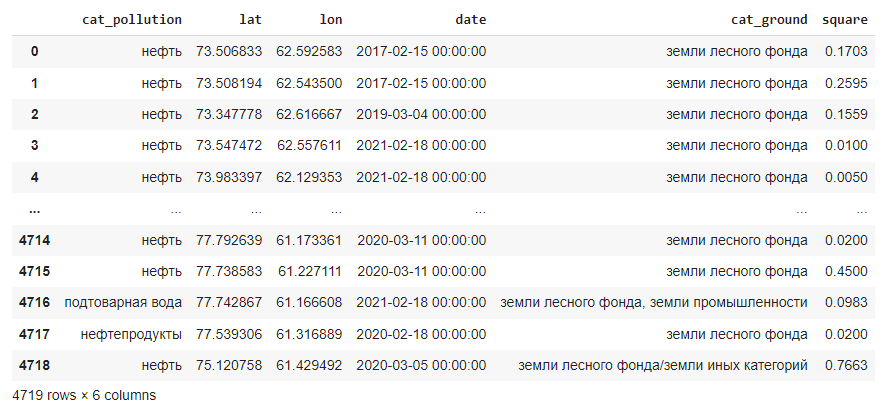

Следующий этап было получение координат по снимкам и временные метки по каждому снимку. Приводилось все в табличный вид.

Для работы со снимками использовалась библиотека eo-learn.

Было замечено, что снимки в каждом году делались одних и тех же участков, поэтому был взят за основу 2021 год и собраны все BBox в виде координат. 

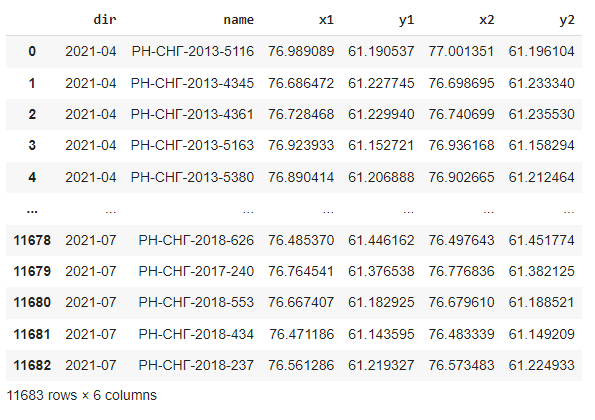

Затем, имея все координаты снимков и координаты загрязнений была создана таблица соответствий файлов и загрязнений. В расчет бралось то понимание, что кооржината разлива будет между координатами у снимка.

Так же понимая дату разлива было легко узнать год, и как следствие архив, где его нужно искать. Сами координаты нам не нужны, а нужна была дата, ну и для возможных улучшений связь с таблицей загрязнений

Эта таблица выглядит так:

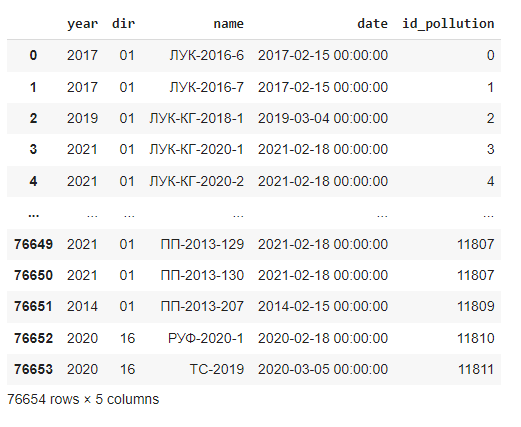

Кроме этого нам нужны временные метки каждого участка, что мы оставили, они будут использоваться в модели при обучения, чтобы брать нужный батч, где есть разлив и сравнивать с другими, которые были до него.

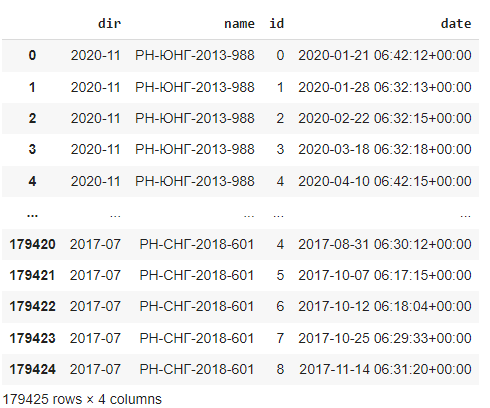

Имея таблицу соответствия файлов и загрязнений была создана облегченная база, где есть все необходимые снимки и данные для обучения нейронной сети

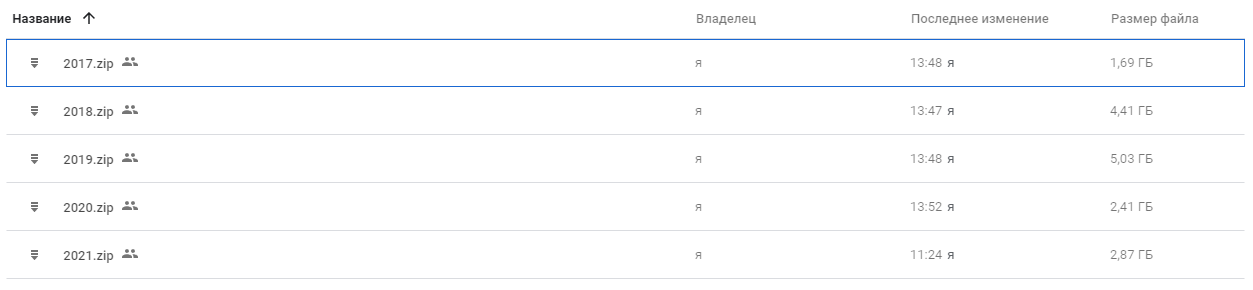

Ещё хочется отметить момент, что достаточно не мало файлов не имели координат для снимков или их временные метки. Такие данные откидывались.

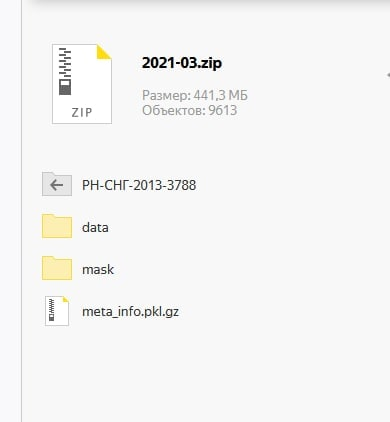